# Import

In [ ]:
!pip install --upgrade pandas_datareader 2>&1 > /dev/null

In [ ]:
import pandas as pd
from pandas_datareader import data as pdr
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import pickle
import warnings

In [ ]:
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

# Motivação

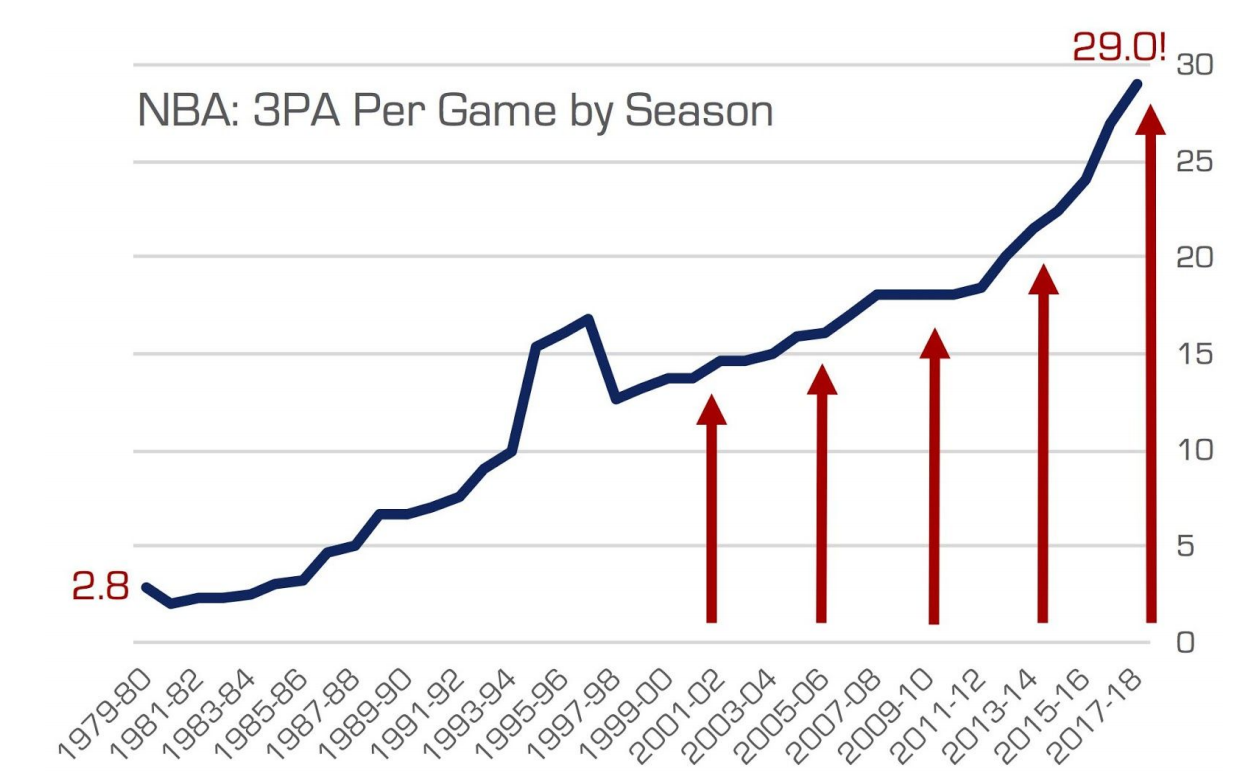


# Funções 

## Funcao Silhouette e Elbow

In [ ]:
from matplotlib import cm
from sklearn.metrics import silhouette_samples

In [ ]:
def elbow(values):
  wcss = []

  for i in range(1, 11):
      kmeans = KMeans(n_clusters = i)
      kmeans.fit(values)
      wcss.append(kmeans.inertia_)

  plt.plot(range(1, 11), wcss)
  plt.title('The elbow method')
  plt.xlabel('Number of clusters')
  plt.ylabel('WCSS') #within cluster sum of squares
  plt.show()

In [ ]:
def silhouette(values, type=None):
  if type=='bar':
    silhouette_scores = []
    for i in range(2,10):
        kmeans = KMeans(n_clusters=i)
        kmeans.fit_predict(values)
        silhouette_scores.append(silhouette_score(values, kmeans.fit_predict(values))) 
    plt.bar(range(2,10), silhouette_scores) 
    plt.xlabel('Número de clusters') 
    plt.ylabel('Score') 
    plt.show()
  else:
    for n_clusters in range(2,11):
      fig, axes = plt.subplots(1, 2, figsize=(20,5))
      clusterer = KMeans(n_clusters=n_clusters)
      cluster_labels = clusterer.fit_predict(values)
      silhouette_values = silhouette_samples(values, cluster_labels)
      y_lower = 10
      for i in range(n_clusters):
        ith_cluster_silhouette_values = silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        # METODO 'nipy_spectral' altera o colormap padrao
        color = cm.nipy_spectral(float(i) / n_clusters)

        axes[0].fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)
        
        # SE QUISER MOSTRAR O LABEL DO CLUSTER
        #axes[0].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10  
        axes[0].set_title("The silhouette plot for the various clusters.")
        axes[0].set_xlabel("The silhouette coefficient values")
        axes[0].set_ylabel("Cluster label")
        silhouette_avg = silhouette_score(values, cluster_labels)
        axes[0].axvline(x=silhouette_avg, color="red", linestyle="--")
        axes[0].set_yticks([]) 
        axes[0].set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        axes[1].scatter(values[:, 2], values[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                    c=colors, edgecolor='k')    

        ## SE QUISER IMPRIMIR O CENTRO
        centers = clusterer.cluster_centers_
        #axes[1].scatter(centers[:, 1], centers[:, 2], marker='o', c="white", alpha=1, s=200, edgecolor='k')
        
        #for i, c in enumerate(centers):
         #   axes[1].scatter(c[1], c[2], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')
        axes[1].set_title("The visualization of the clustered data.")
        axes[1].set_xlabel("Feature space for the 1st feature")
        axes[1].set_ylabel("Feature space for the 2nd feature")
        plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                      "with n_clusters = %d" % n_clusters),
                    fontsize=14, fontweight='bold')

    plt.show()

## Funcao Avaliacao de Coluna

In [ ]:
def evalFeatures(df, column,evalColumns):
  clf = RandomForestClassifier()
  clf.fit(df.iloc[:,:evalColumns].values, df[column].values)
  sorted_feature = np.argsort(clf.feature_importances_)[::-1]

  most_important_features = np.take_along_axis(
    np.array(df.iloc[:,:evalColumns].columns.tolist()), sorted_feature, axis=0)

  most_import_weights = np.take_along_axis(
    np.array(clf.feature_importances_), sorted_feature, axis=0)

  return list(zip(most_important_features, most_import_weights))

## Funcao NBA

In [ ]:
def criacao_colunas(dataset):
  dataset['PPG'] = round(dataset['PTS'] / dataset['G'],3)
  dataset['RPG'] = round(dataset['TRB'] / dataset['G'],3)
  dataset['APG'] = round(dataset['AST'] / dataset['G'],3)
  dataset['BPG'] = round(dataset['BLK'] / dataset['G'],3)
  dataset['SPG'] = round(dataset['STL'] / dataset['G'],3)
  dataset['3PG'] = round(dataset['3P'] / dataset['G'],3)
  dataset['2PG'] = round(dataset['2P'] / dataset['G'],3)

In [ ]:
def criacao_colunas_def(dataset):
  dataset['RPG'] = round(dataset['TRB'] / dataset['G'],3)
  dataset['BPG'] = round(dataset['BLK'] / dataset['G'],3)
  dataset['SPG'] = round(dataset['STL'] / dataset['G'],3)
  dataset['DRBG'] = round(dataset['DRB'] / dataset['G'],3)

In [ ]:
def criacao_colunas_off(dataset):
  dataset['PPG'] = round(dataset['PTS'] / dataset['G'],3)
  dataset['APG'] = round(dataset['AST'] / dataset['G'],3)
  dataset['3PG'] = round(dataset['3P'] / dataset['G'],3)
  dataset['2PG'] = round(dataset['2P'] / dataset['G'],3)
  dataset['ORBG'] = round(dataset['ORB'] / dataset['G'],3)
  dataset['FTG'] = round(dataset['FT'] / dataset['G'],3)
  dataset['FGG'] = round(dataset['FG'] / dataset['G'],3)

In [ ]:
NBA_2021.columns

Index(['Rk', 'Nickname', 'Pos', 'Age', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%',
       '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%',
       'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'SEASON',
       'clusters'],
      dtype='object')

In [ ]:
def excluindo_colunas(dataset):
  #dictPosition = {'SG': 2,'PF': 4,'C': 5,'PG': 1,'SF': 3}
  #dataset['Pos'] = dataset['Pos'].map(dictPosition)
  dataset = dataset.drop(['Nickname','Pos','SEASON','Age', 'Rk','FG%', '3P%', '2P%', 'eFG%','FT%'],axis=1)
  dataset
  return dataset

In [ ]:
def excluindo_colunas_def(dataset):
  dataset = dataset.drop(['RPG','PPG','APG','3PG','2PG','Nickname','SEASON','Player','Age', 'Rk','Tm','G', 'GS', 'MP', 'FG','FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT','FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF','PTS'],axis=1)
  dictPosition = {'SG': 2,'PF': 4,'C': 5,'PG': 1,'SF': 3}
  dataset['Pos'] = dataset['Pos'].map(dictPosition)
  dataset
  return dataset

In [ ]:
def excluindo_colunas_off(dataset):
  dataset = dataset.drop(['RPG','BPG','SPG','Nickname','SEASON','Player','Age', 'Rk','Tm','G', 'GS', 'MP', 'FG','FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT','FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF','PTS'],axis=1)
  dictPosition = {'SG': 2,'PF': 4,'C': 5,'PG': 1,'SF': 3}
  dataset['Pos'] = dataset['Pos'].map(dictPosition)
  return dataset

In [ ]:
def cluster_nba(dataset):
  scaler = StandardScaler()
  ds_Players = scaler.fit_transform(dataset)
  Players_scaled = pd.DataFrame(ds_Players, columns=dataset.columns,index=dataset.index)
  elbow(ds_Players)
  silhouette(ds_Players)
  return Players_scaled

In [ ]:
def cluster_kmeans_nba(dataset,dataset_original,x):
  kmeans = KMeans(n_clusters=x)
  ykmeans = kmeans.fit_predict(dataset)
  dataset['clusters'] = ykmeans
  dataset_original['clusters'] = ykmeans
  return dataset,dataset_original

In [ ]:
def NBA_Clusters(dataset,x):
  #criacao_colunas(dataset)
  dataset_scaled = excluindo_colunas(dataset)
  dataset_scaled = cluster_nba(dataset_scaled)
  dataset_scaled,dataset = cluster_kmeans_nba(dataset_scaled,dataset,x)
  return dataset_scaled,dataset

In [ ]:
def NBA_Clusters_Off(dataset,x):
  criacao_colunas_off(dataset)
  dataset_scaled = excluindo_colunas_off(dataset)
  dataset_scaled = cluster_nba(dataset_scaled)
  dataset_scaled,dataset = cluster_kmeans_nba(dataset_scaled,dataset,x)
  return dataset_scaled,dataset

In [ ]:
def NBA_Clusters_Def(dataset,x):
  criacao_colunas_def(dataset)
  dataset_scaled = excluindo_colunas_def(dataset)
  dataset_scaled = cluster_nba(dataset_scaled)
  dataset_scaled,dataset = cluster_kmeans_nba(dataset_scaled,dataset,x)
  return dataset_scaled,dataset

# **Caso NBA 2020-21**

**RESUMO DA TEMPORADA 2020-21**

---


*   League Champion: Milwaukee Bucks
*   Most Valuable Player: Nikola Jokić (26.4/10.8/8.3)
*   Rookie of the Year: LaMelo Ball (15.7/5.9/6.1)
*   PPG Leader: Stephen Curry (32.0)
*   RPG Leader: Clint Capela (14.3)
*   APG Leader: Russell Westbrook (11.7)
*   Defensive Player of the Year: Rudy Gobert

## Caso NBA 2020-21 - Leitura do Arquivo

In [ ]:
NBA_2021 = pd.read_csv('/content/drive/MyDrive/Pós-Graduação/Projeto/2020-21.csv', sep=",")

In [ ]:
NBA_2021 = NBA_2021.loc[NBA_2021['Tm'] != 'TOT']

In [ ]:
NBA_2021 = NBA_2021.set_index(['Player','Tm'])

In [ ]:
NBA_2021.index

MultiIndex([(        'Precious Achiuwa', 'MIA'),
            (            'Jaylen Adams', 'MIL'),
            (            'Steven Adams', 'NOP'),
            (             'Bam Adebayo', 'MIA'),
            (       'LaMarcus Aldridge', 'SAS'),
            (       'LaMarcus Aldridge', 'BRK'),
            (       'Ty-Shon Alexander', 'PHO'),
            ('Nickeil Alexander-Walker', 'NOP'),
            (           'Grayson Allen', 'MEM'),
            (           'Jarrett Allen', 'BRK'),
            ...
            (         'Cassius Winston', 'WAS'),
            (           'James Wiseman', 'GSW'),
            (          'Christian Wood', 'HOU'),
            (          'Robert Woodard', 'SAC'),
            (            'Delon Wright', 'DET'),
            (            'Delon Wright', 'SAC'),
            (          'Thaddeus Young', 'CHI'),
            (              'Trae Young', 'ATL'),
            (             'Cody Zeller', 'CHO'),
            (             'Ivica Zubac', 'LAC')],
   

In [ ]:
NBA_2021.columns

Index(['Rk', 'Nickname', 'Pos', 'Age', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%',
       '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%',
       'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'SEASON'],
      dtype='object')

*   Rk - Ranking de acordo com o Basketball Reference
*   Player - Nome do Jogador
*   Nickname - Código do Jogador
*   Pos - Posição do Jogador
*   Age - Idade do Jogador
*   Tm - Time do Jogador
*   G - Jogos pelo Jogador
*   GS - Jogos Começado pelo Jogador
*   MP - Minutos jogador pelo Jogador
*   FG - Arremessos acertados
*   FGA - Tentativa de Arremessos
*   FG% - Porcentagem de Acertos de arremessos
*   3P - Arremessos acertados de 3 pts
*   3PA - Tentativa de Arremessos de 3 pts
*   3P% - Porcentagem de Acertos de 3 pts
*   2P - Arremessos acertados de 2pts
*   2PA - Tentativa de Arremessos de 2pts
*   2P% - Porcentagem de Acertos de 2pts
*   eFG% - Porcentagem de acertos efetivos levando em consideração o valor de 3 pts e 2 pts
*   FT - Acertos de Lance Livre
*   FTA - Tentativa de Lance Livre
*   FT% - Porcentagem de Lance Livre
*   ORB - Rebotes ofensivos
*   DRB - Rebotes defensivos
*   TRB - Total de Rebotes
*   AST - Total de Assistencia
*   STL - Roubos de Bola
*   BLK - Bloqueios
*   TOV - Turnovers (Perdas de Jogadas)
*   PF - Faltas pessoais
*   PTS - Total de Pontos
*   Season - Temporada jogada

## Caso NBA 2020-21 -  Ajustes de Posicao

In [ ]:
NBA_2021['Pos'].value_counts()

SG    147
PF    131
C     121
PG    116
SF    111
Name: Pos, dtype: int64

In [ ]:
dictPos = {
    'SG': 'SG',
    'PF': 'PF',
    'C': 'C',
    'PG': 'PG',
    'SF': 'SF',
    'SF-PF': 'SF',
    'SF-SG': 'SF',
    'SG-PG': 'SG',
    'C-PF': 'C',
    'PF-SF': 'PF',
    'PF-C': 'PF',
    'PG-SG': 'PG'
}

In [ ]:
NBA_2021['Pos'] = NBA_2021['Pos'].map(dictPos)

## Caso NBA 2020-21 - PCA

In [ ]:
!pip install rogeriopradoj-paretochart

  Created wheel for rogeriopradoj-paretochart: filename=rogeriopradoj_paretochart-2.0.0-py3-none-any.whl size=6376 sha256=e66ddf079a8487c44c272f409b0179a14cfdcf6d878724d1ccb2aee7695e8f65
  Stored in directory: /root/.cache/pip/wheels/2f/8e/3d/5268e0388c792123e4f39c0d27730438dd1b66217d23da3bc4
Successfully built rogeriopradoj-paretochart


## Caso NBA 2020-21 - Clusterizacao

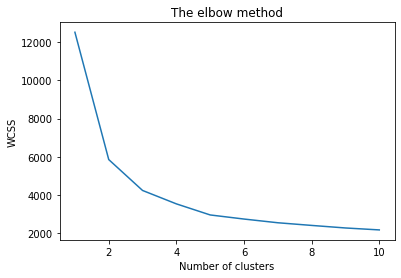

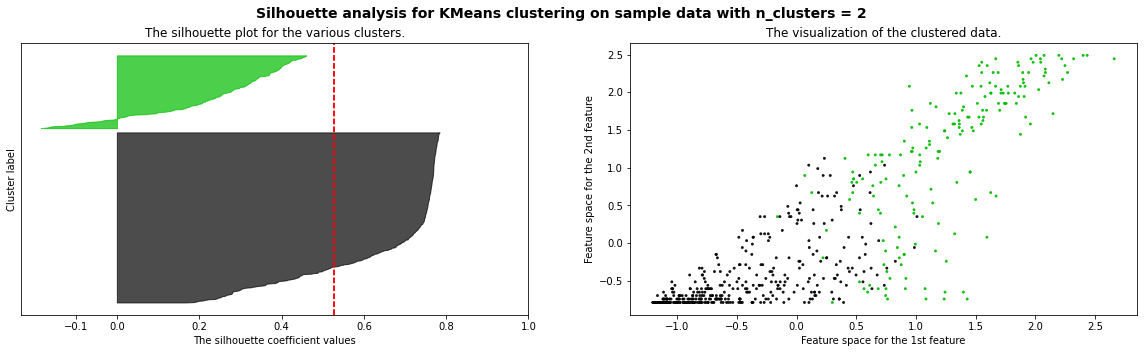

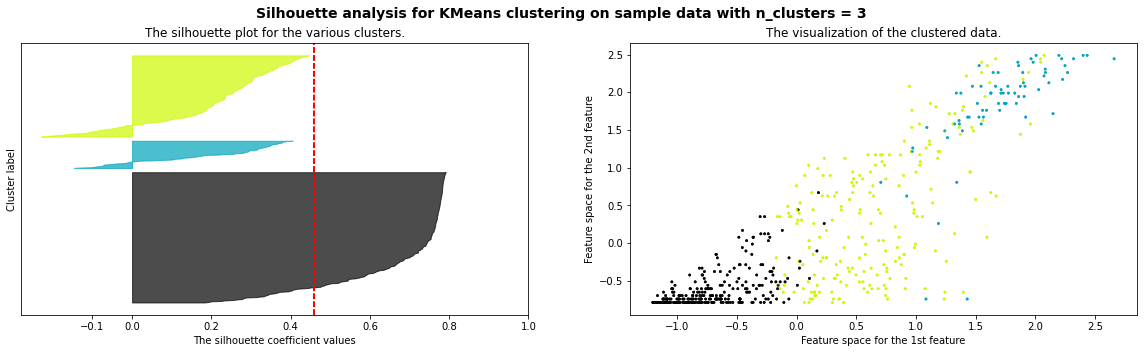

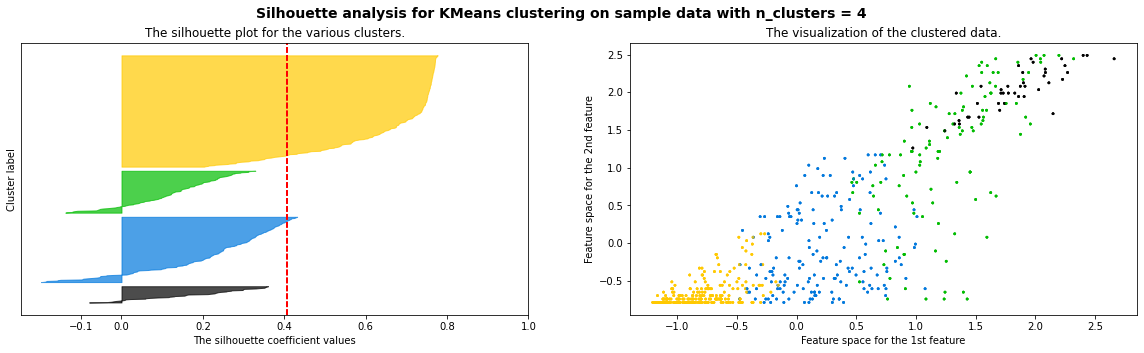

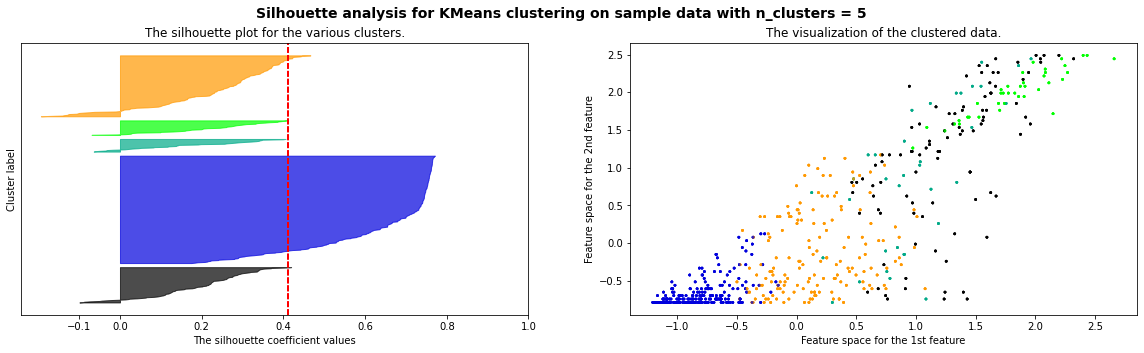

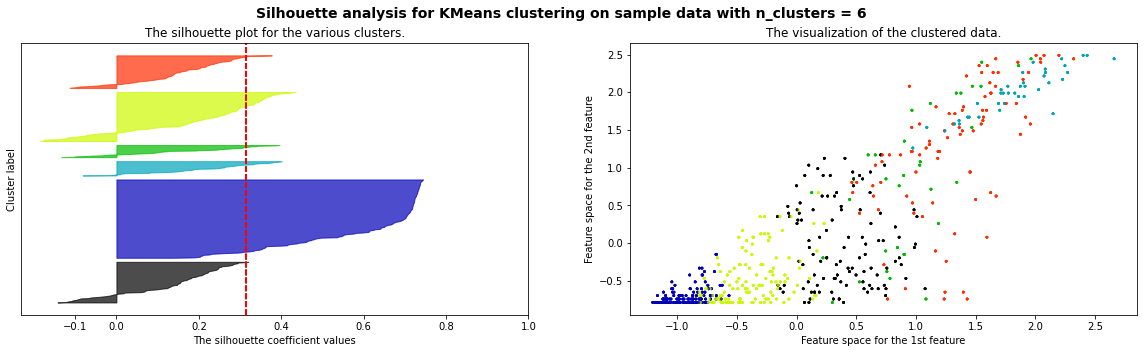

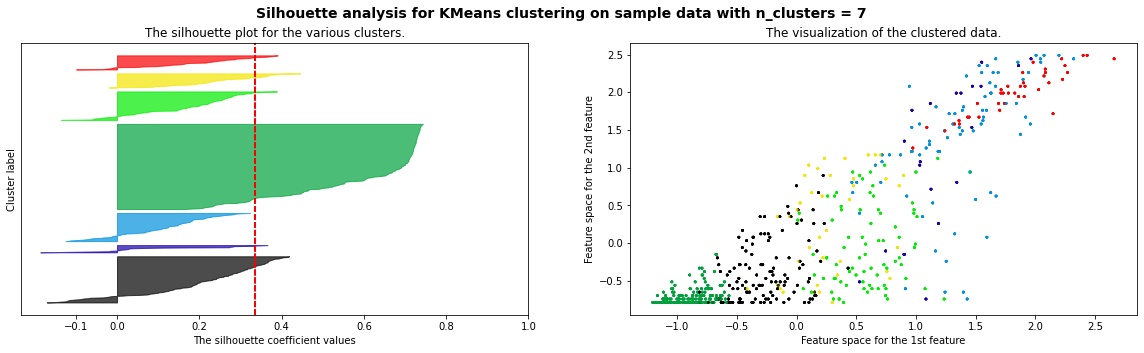

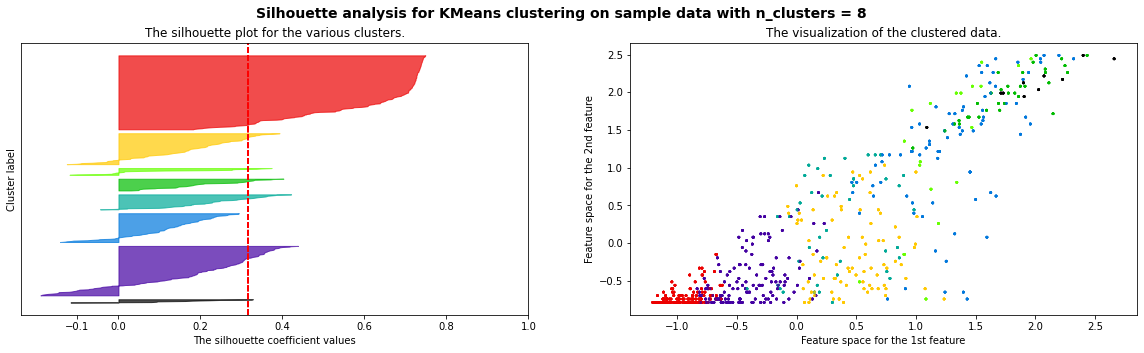

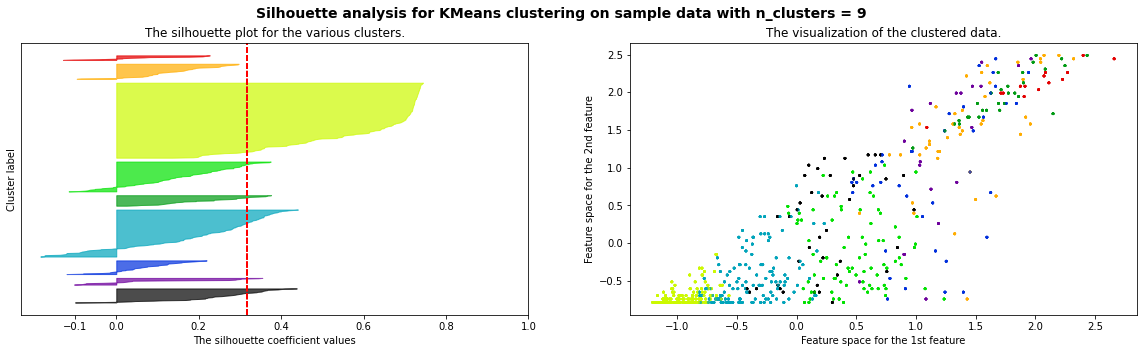

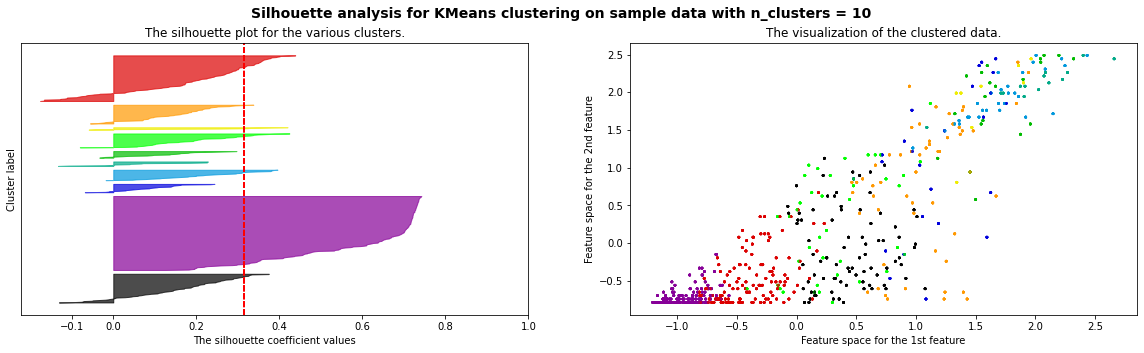

In [ ]:
NBA_Players,NBA_2021 = NBA_Clusters(NBA_2021,5)

In [ ]:
NBA_Players.head()

,,G,GS,MP,FG,FGA,3P,3PA,2P,2PA,FT,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,clusters
Player,Tm,,,,,,,,,,,,,,,,,,,,,
Precious Achiuwa,MIA,1.110181,-0.602447,-0.139321,-0.124693,-0.253517,-0.829659,-0.876711,0.227760,0.201212,-0.033329,...,0.922316,0.136865,0.360075,-0.525843,-0.252591,0.512324,-0.053859,0.455060,-0.206183,1
Jaylen Adams,MIL,-1.369898,-0.784285,-1.182081,-0.967188,-0.977057,-0.829659,-0.869314,-0.866186,-0.871872,-0.766320,...,-0.800402,-0.987780,-0.978447,-0.776748,-1.077001,-0.769985,-0.932511,-1.220961,-0.958489,0
Steven Adams,NOP,0.972399,1.852365,1.119533,0.320529,0.009588,-0.829659,-0.861917,0.805861,0.579947,0.019027,...,4.226159,1.551192,2.358065,0.236164,1.148906,0.970291,0.661323,0.864754,0.127622,3
Bam Adebayo,MIA,1.247963,2.125122,1.899791,2.149360,1.627685,-0.791787,-0.824933,3.162736,2.944615,2.937903,...,2.550639,2.658797,2.743298,2.419965,2.014537,2.252600,2.520796,1.460673,2.018352,2
LaMarcus Aldridge,SAS,-0.726915,0.033986,-0.419227,-0.186339,-0.187741,-0.318378,-0.329340,-0.092420,-0.060990,-0.360557,...,-0.399221,-0.357297,-0.384274,-0.460794,-0.747237,0.054356,-0.523836,-0.569175,-0.246040,0


In [ ]:
NBA_Players

,,G,GS,MP,FG,FGA,3P,3PA,2P,2PA,FT,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,clusters
Player,Tm,,,,,,,,,,,,,,,,,,,,,
Precious Achiuwa,MIA,1.110181,-0.602447,-0.139321,-0.124693,-0.253517,-0.829659,-0.876711,0.227760,0.201212,-0.033329,...,0.922316,0.136865,0.360075,-0.525843,-0.252591,0.512324,-0.053859,0.455060,-0.206183,1
Jaylen Adams,MIL,-1.369898,-0.784285,-1.182081,-0.967188,-0.977057,-0.829659,-0.869314,-0.866186,-0.871872,-0.766320,...,-0.800402,-0.987780,-0.978447,-0.776748,-1.077001,-0.769985,-0.932511,-1.220961,-0.958489,0
Steven Adams,NOP,0.972399,1.852365,1.119533,0.320529,0.009588,-0.829659,-0.861917,0.805861,0.579947,0.019027,...,4.226159,1.551192,2.358065,0.236164,1.148906,0.970291,0.661323,0.864754,0.127622,3
Bam Adebayo,MIA,1.247963,2.125122,1.899791,2.149360,1.627685,-0.791787,-0.824933,3.162736,2.944615,2.937903,...,2.550639,2.658797,2.743298,2.419965,2.014537,2.252600,2.520796,1.460673,2.018352,2
LaMarcus Aldridge,SAS,-0.726915,0.033986,-0.419227,-0.186339,-0.187741,-0.318378,-0.329340,-0.092420,-0.060990,-0.360557,...,-0.399221,-0.357297,-0.384274,-0.460794,-0.747237,0.054356,-0.523836,-0.569175,-0.246040,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Delon Wright,SAC,-0.451350,-0.420609,-0.198783,-0.261684,-0.263384,-0.204760,-0.270165,-0.243615,-0.211513,-0.373646,...,-0.139633,-0.357297,-0.312450,0.106065,0.695481,-0.266221,-0.217329,-0.680910,-0.288388,1
Thaddeus Young,CHI,1.431673,0.261283,1.187697,1.560298,1.173829,-0.602423,-0.551247,2.308925,2.094889,0.163008,...,3.164210,1.159270,1.763891,1.908863,1.973317,1.061884,1.866916,1.591030,1.086688,3
Trae Young,ATL,1.202036,2.079663,1.873686,2.361696,2.653796,1.745681,2.052466,2.246668,2.570736,5.568817,...,0.096356,0.750308,0.601662,4.724573,1.107686,-0.220424,4.400703,0.827509,3.007311,2


In [ ]:
NBA_2021[NBA_2021.index.get_level_values('Tm').isin(['MIL'])]

,,Rk,Nickname,Pos,Age,G,GS,MP,FG,FGA,FG%,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,SEASON,clusters
Player,Tm,,,,,,,,,,,,,,,,,,,,,
Jaylen Adams,MIL,2,adamsja01,PG,24,7,0,18,1,8,0.125,...,3,3,2,0,0,0,1,2,2020.0,0
Giannis Antetokounmpo,MIL,12,antetgi01,PF,26,61,61,2013,626,1100,0.569,...,574,671,357,72,73,207,168,1717,2020.0,2
Thanasis Antetokounmpo,MIL,14,antetth01,SF,28,57,3,551,67,137,0.489,...,70,124,46,22,10,43,74,166,2020.0,1
D.J. Augustin,MIL,20,augusdj01,PG,33,37,6,713,71,192,0.370,...,39,50,110,20,1,34,33,227,2020.0,0
Elijah Bryant,MIL,79,bryanel01,SG,25,1,0,32,6,13,0.462,...,4,6,3,0,1,4,4,16,2020.0,0
Pat Connaughton,MIL,107,connapa01,SG,28,69,4,1575,168,387,0.434,...,269,332,81,49,23,33,99,468,2020.0,1
Torrey Craig,MIL,112,craigto01,SF,30,18,0,201,18,46,0.391,...,30,43,16,9,7,5,24,45,2020.0,0
Mamadi Diakite,MIL,125,diakima01,PF,24,14,1,141,16,40,0.400,...,26,34,8,7,6,3,16,44,2020.0,0
Donte DiVincenzo,MIL,129,divindo01,SG,24,66,66,1814,253,603,0.420,...,299,380,203,72,15,91,112,688,2020.0,4


In [ ]:
NBA_Players = NBA_Players.drop(['clusters'],axis=1)


In [ ]:
NBA_2021 = NBA_2021.drop(['clusters'],axis=1)

In [ ]:
corr = NBA_Players.corr()

cmap = sns.diverging_palette(230, 20, as_cmap=True)
fig, ax = plt.subplots(1, 1, figsize=(12, 12))
sns.heatmap(corr, cmap=cmap, ax=ax)

NameError: ignored

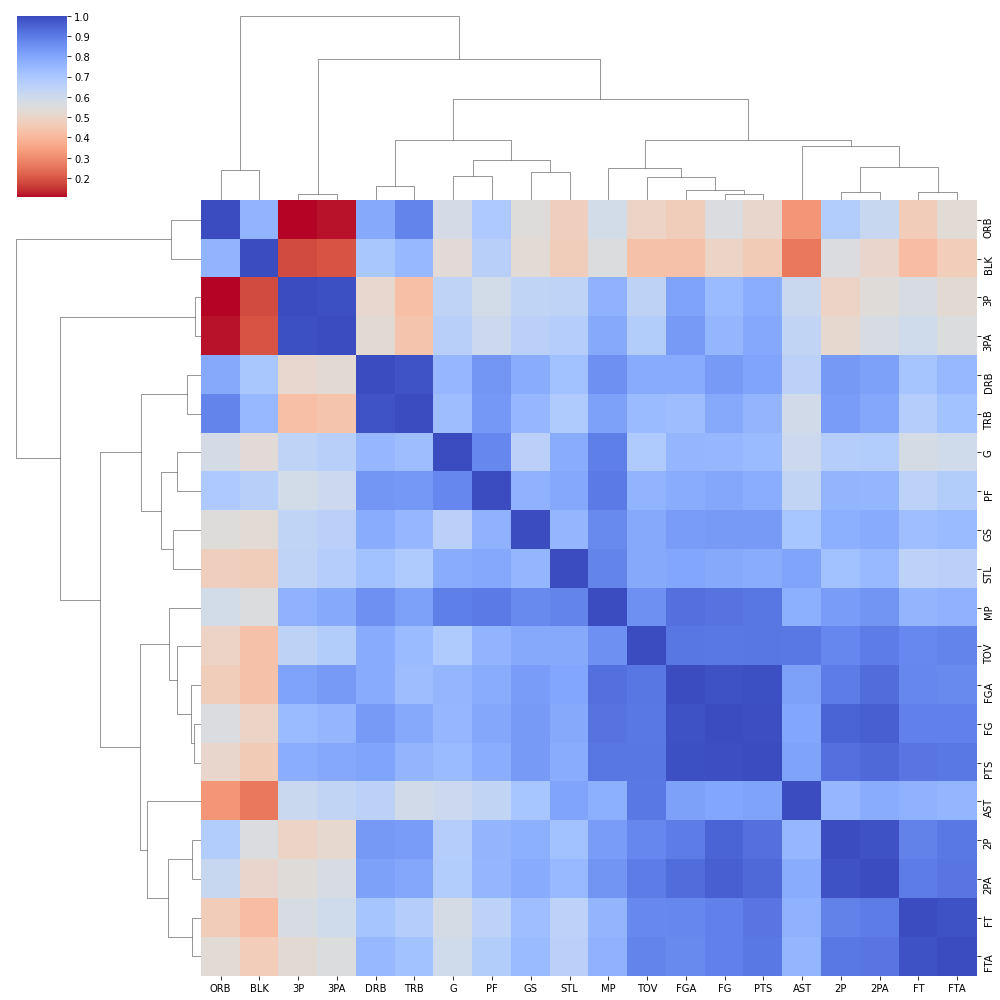

In [ ]:
sns.clustermap(corr, figsize=(14, 14), method="ward", cmap="coolwarm_r")

In [ ]:
from sklearn.metrics import DistanceMetric

euclidian = DistanceMetric.get_metric('euclidean')

In [ ]:
!pip install yellowbrick

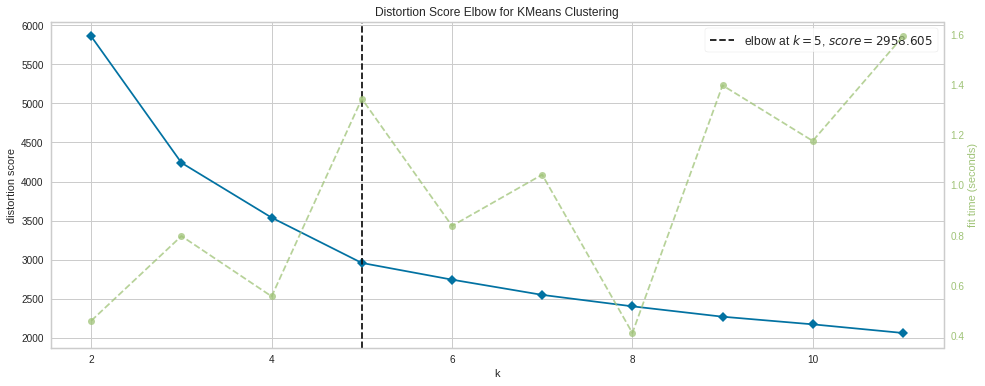

In [ ]:
from sklearn.cluster import KMeans

from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
model = KMeans()

fig, ax = plt.subplots(1, 1, figsize=(16, 6))
visualizer = KElbowVisualizer(model, k=(2, 12), ax=ax)

visualizer.fit(NBA_Players)

visualizer.show()

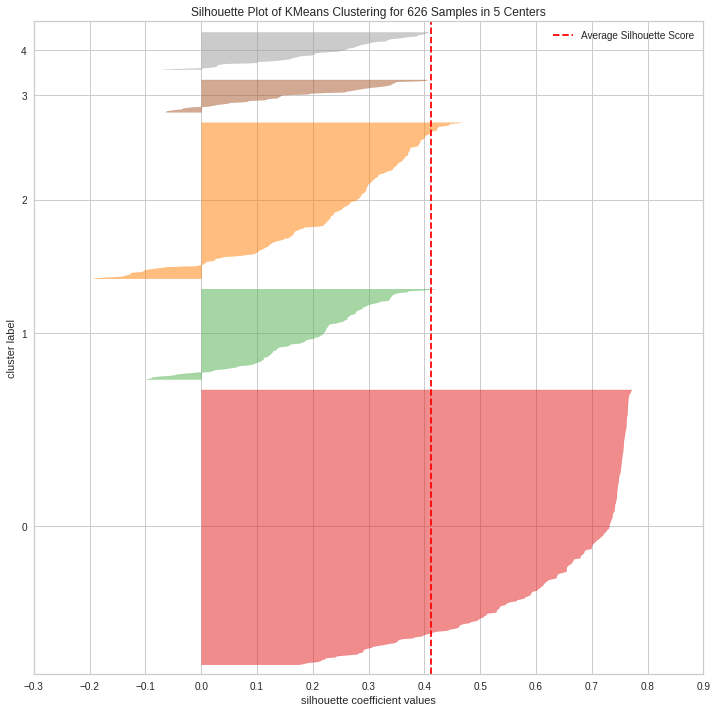

In [ ]:
model = KMeans(5, random_state=42)

fig, ax = plt.subplots(1, 1, figsize=(12, 12))

visualizer = SilhouetteVisualizer(model, ax=ax)
visualizer.fit(NBA_Players)
visualizer.show()

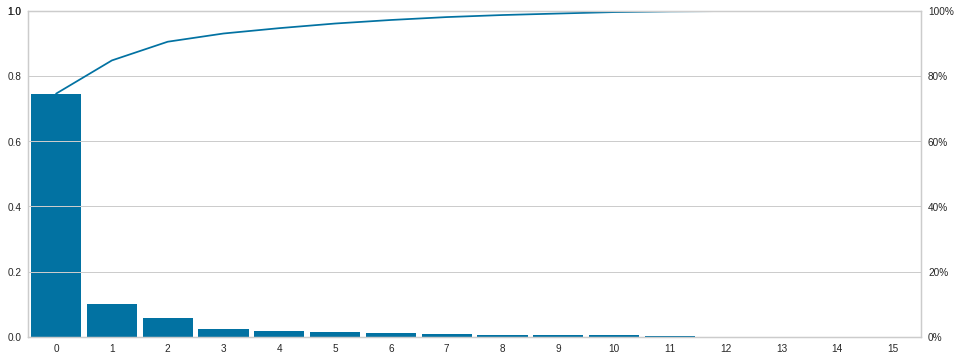

In [ ]:
from sklearn.decomposition import PCA
from paretochart.paretochart import pareto

pca= PCA(n_components=20)
pca.fit(NBA_Players)

fig, ax = plt.subplots(1, 1, figsize=(16, 6))
pareto(pca.explained_variance_ratio_)
ax.grid()

In [ ]:
pca= PCA(n_components=2)
pca.fit(NBA_Players)

pd.DataFrame(pca.components_.T, columns=["PC1", "PC2"], index=NBA_Players.columns)

,PC1,PC2
G,0.213504,0.034911
GS,0.226506,-0.005835
MP,0.249016,-0.036261
FG,0.252430,-0.071564
FGA,0.249456,-0.151903
3P,0.185361,-0.390050
3PA,0.190996,-0.386253
2P,0.240711,0.090272
2PA,0.242919,0.029281
FT,0.226807,-0.071459


In [ ]:
data_pca = pd.DataFrame(pca.transform(NBA_Players),
                        columns=["PC1", "PC2"],
                        index=NBA_Players.index)

data_pca

,,PC1,PC2
Player,Tm,,
Precious Achiuwa,MIA,0.046565,1.803655
Jaylen Adams,MIL,-4.197814,-0.166135
Steven Adams,NOP,3.591804,4.194856
Bam Adebayo,MIA,9.099331,3.141449
LaMarcus Aldridge,SAS,-1.488608,0.065554
...,...,...,...
Delon Wright,SAC,-1.073717,-0.216674
Thaddeus Young,CHI,5.608632,2.681693
Trae Young,ATL,10.290327,-3.538332


In [ ]:
data_pca['clusters'] = model.predict(NBA_Players)

In [ ]:
NBA_2021['clusters'] = model.predict(NBA_Players)

In [ ]:
NBA_Players['clusters'] = model.predict(NBA_Players)

In [ ]:
data_pca_mil = data_pca[data_pca.index.get_level_values('Tm').isin(['GSW'])]

In [ ]:
data_pca_mil

,,PC1,PC2,clusters
Player,Tm,,,
Udoka Azubuike,UTA,-3.911051,0.011604,0
Bojan Bogdanović,UTA,6.685190,-2.607773,1
Jarrell Brantley,UTA,-3.384342,-0.137728,0
Jordan Clarkson,UTA,5.907836,-3.072456,1
Mike Conley,UTA,4.011185,-2.260223,1
Derrick Favors,UTA,1.622133,3.953295,3
Trent Forrest,UTA,-2.904200,-0.052177,0
Rudy Gobert,UTA,9.736782,8.936915,3
Shaquille Harrison,UTA,-3.912109,-0.133165,0


In [ ]:
data_pca_lal = data_pca[data_pca.index.get_level_values('Tm').isin(['LAL'])]

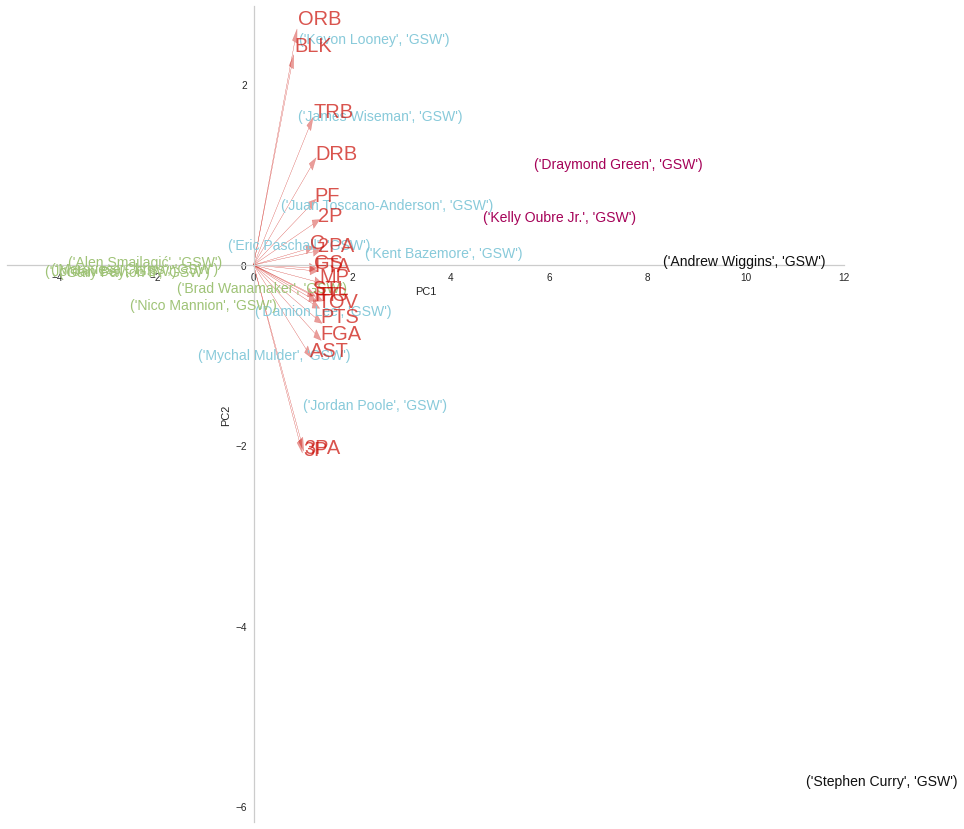

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(15, 15))


ax.spines["left"].set_position("zero")
ax.spines["bottom"].set_position("zero")

ax.spines["right"].set_color("none")
ax.spines["top"].set_color("none")
ax.grid(False)
sns.scatterplot(data=data_pca_mil, x="PC1", y="PC2", ax=ax, alpha=0)

#clusters = model.predict(NBA_Players)


colors = ['g', 'm', 'c', 'y','k']

for idx in range(data_pca_mil.shape[0]):
    color = colors[data_pca_mil['clusters'][idx]]
    ax.text(x=data_pca_mil.PC1[idx], y=data_pca_mil.PC2[idx], s=data_pca_mil.index[idx],
            fontdict={'color': color, 'fontsize':14})
    

def plot_components(coeff, ax, labels):
    """
    Plot variables importance by component
    """
    for idx in range(coeff.shape[0]):
        ax.arrow(0, 0, coeff[idx, 0] * 5, coeff[idx, 1] *5, head_width=.1, color='r', alpha=0.4)
        ax.text(coeff[idx, 0] * 5.4, coeff[idx, 1] * 5.4 , s=labels[idx],
                fontdict={'color': 'r', 'fontsize':20}, alpha=0.7)

plot_components(pca.components_.T, ax, NBA_Players.columns)

In [ ]:
data_pca[data_pca.index.get_level_values('Tm').isin(['MIL'])]

,,PC1,PC2,clusters
Player,Tm,,,
Jaylen Adams,MIL,-4.197814,-0.166135,0
Giannis Antetokounmpo,MIL,12.185486,1.682846,4
Thanasis Antetokounmpo,MIL,-1.256580,0.811307,2
D.J. Augustin,MIL,-1.620100,-0.996956,0
Elijah Bryant,MIL,-4.139544,-0.151371,0
Pat Connaughton,MIL,1.700126,0.225717,2
Torrey Craig,MIL,-3.387229,0.116830,0
Mamadi Diakite,MIL,-3.537876,0.102643,0
Donte DiVincenzo,MIL,4.423684,-0.551882,1


## Caso NBA 2020-21 - Analise Clusterizacao

In [ ]:
NBA_2021.columns

Index(['Rk', 'Nickname', 'Pos', 'Age', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%',
       '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%',
       'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'SEASON'],
      dtype='object')

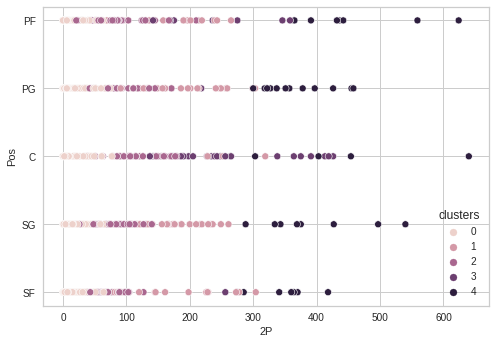

In [ ]:
sns.scatterplot(x='2P', y='Pos', data=NBA_2021, hue='clusters')
plt.show()

In [ ]:
sns.scatterplot(x='PPG', y='G', data=NBA_2021, hue='clusters',palette=['red','green','blue','black','magenta'])
plt.show()

In [ ]:
sns.scatterplot(x='RPG', y='G', data=NBA_2021, hue='clusters',palette=['red','green','blue','black','magenta'])
plt.show()

In [ ]:
sns.scatterplot(x='3PG', y='G', data=NBA_2021, hue='clusters',palette=['red','green','blue','black','magenta'])
plt.show()

In [ ]:
NBA_2021[NBA_2021.index.get_level_values('Tm').isin(['LAL'])]

,,Rk,Nickname,Pos,Age,G,GS,MP,FG,FGA,FG%,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,SEASON,clusters
Player,Tm,,,,,,,,,,,,,,,,,,,,,
Kostas Antetokounmpo,LAL,13,antetko01,PF,23,15,0,56,3,10,0.300,...,15,19,1,2,4,11,8,12,2020.0,0
Devontae Cacok,LAL,86,cacokde01,PF,24,20,1,98,17,29,0.586,...,20,32,1,5,4,5,8,39,2020.0,0
Kentavious Caldwell-Pope,LAL,87,caldwke01,SG,27,67,67,1902,218,506,0.431,...,152,179,127,62,26,66,114,653,2020.0,1
Alex Caruso,LAL,96,carusal01,PG,26,58,6,1216,133,305,0.436,...,139,170,160,64,15,76,108,370,2020.0,2
Quinn Cook,LAL,108,cookqu01,PG,27,16,0,62,12,26,0.462,...,5,5,5,1,1,3,2,33,2020.0,0
Anthony Davis,LAL,118,davisan02,PF,27,36,36,1162,301,613,0.491,...,224,286,110,45,59,74,60,786,2020.0,3
Andre Drummond,LAL,137,drumman01,C,27,21,21,520,102,192,0.531,...,149,214,30,23,20,43,80,250,2020.0,2
Jared Dudley,LAL,138,dudleja01,PF,35,12,0,81,2,9,0.222,...,17,21,5,1,1,2,7,6,2020.0,0
Marc Gasol,LAL,172,gasolma01,C,36,52,42,993,88,194,0.454,...,177,215,109,26,58,53,115,262,2020.0,2


In [ ]:
NBA_2021[NBA_2021.index.get_level_values('Tm').isin(['LAL'])]['clusters'] == 4

Player                    Tm 
Kostas Antetokounmpo      LAL    False
Devontae Cacok            LAL    False
Kentavious Caldwell-Pope  LAL    False
Alex Caruso               LAL    False
Quinn Cook                LAL    False
Anthony Davis             LAL    False
Andre Drummond            LAL    False
Jared Dudley              LAL    False
Marc Gasol                LAL    False
Montrezl Harrell          LAL    False
Talen Horton-Tucker       LAL    False
LeBron James              LAL     True
Damian Jones              LAL    False
Kyle Kuzma                LAL    False
Wesley Matthews           LAL    False
Alfonzo McKinnie          LAL    False
Ben McLemore              LAL    False
Markieff Morris           LAL    False
Dennis Schröder           LAL    False
Name: clusters, dtype: bool

In [ ]:
NBA_2021.loc[NBA_2021['Tm'] == 'LAL'][NBA_2021['clusters'] == 4]

## Caso NBA 2020-21 - Estudo do Pivo

In [ ]:
NBA_2021_C

Rk   Nickname Pos  Age   G  GS    MP   FG  FGA    FG%  \
Player            Tm                                                            
Steven Adams      NOP    3  adamsst01   C   27  58  58  1605  189  308  0.614   
Bam Adebayo       MIA    4  adebaba01   C   23  64  64  2143  456  800  0.570   
LaMarcus Aldridge SAS    5  aldrila01   C   35  21  18   544  115  248  0.464   
                  BRK    5  aldrila01   C   35   5   5   130   25   48  0.521   
Jarrett Allen     BRK    9  allenja01   C   22  12   5   320   44   65  0.677   
...                    ...        ...  ..  ...  ..  ..   ...  ...  ...    ...   
Robert Williams   BOS  527  williro04   C   23  52  13   985  186  258  0.721   
James Wiseman     GSW  533  wisemja01   C   19  39  27   836  191  368  0.519   
Christian Wood    HOU  534   woodch01   C   25  41  41  1326  329  640  0.514   
Cody Zeller       CHO  539  zelleco01   C   28  48  21  1005  181  324  0.559   
Ivica Zubac       LAC  540  zubaciv01   C   23  72  33  1609  257  394  0.652   

                       ...  ORB  DRB  TRB  AST  STL  BLK  TOV   PF   PTS  \
Player            Tm   ...                                                 
Steven Adams      NOP  ...  213  301  514  111   54   38   78  113   438   
Bam Adebayo       MIA  ...  142  431  573  346   75   66  169  145  1197   
LaMarcus Aldridge SAS  ...   17   77   94   36    8   18   20   36   288   
                  BRK  ...    2   22   24   13    3   11    7   11    64   
Jarrett Allen     BRK  ...   38   87  125   20    7   19   22   21   134   
...                    ...  ...  ...  ...  ...  ...  ...  ...  ...   ...   
Robert Williams   BOS  ...  133  225  358   94   43   91   52  105   417   
James Wiseman     GSW  ...   55  171  226   26   11   36   60  121   448   
Christian Wood    HOU  ...   76  319  395   71   34   48   80   88   860   
Cody Zeller       CHO  ...  119  209  328   86   27   17   51  121   451   
Ivica Zubac       LAC  ...  189  330  519   90   24   62   81  187   650   

                       SEASON  
Player            Tm           
Steven Adams      NOP  2020.0  
Bam Adebayo       MIA  2020.0  
LaMarcus Aldridge SAS  2020.0  
                  BRK  2020.0  
Jarrett Allen     BRK  2020.0  
...                       ...  
Robert Williams   BOS  2020.0  
James Wiseman     GSW  2020.0  
Christian Wood    HOU  2020.0  
Cody Zeller       CHO  2020.0  
Ivica Zubac       LAC     NaN  

[121 rows x 30 columns]

In [ ]:
NBA_2021_C = NBA_2021.iloc[:,:-1]

In [ ]:
NBA_2021_C = NBA_2021_C.loc[NBA_2021['Pos'] == 'C']

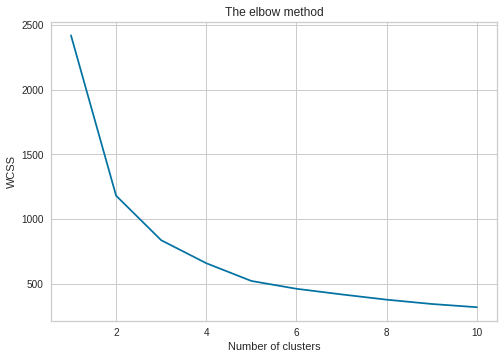

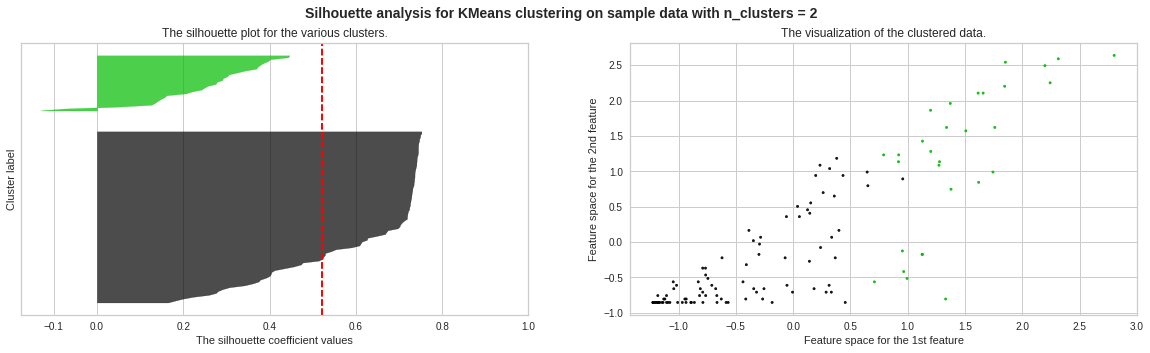

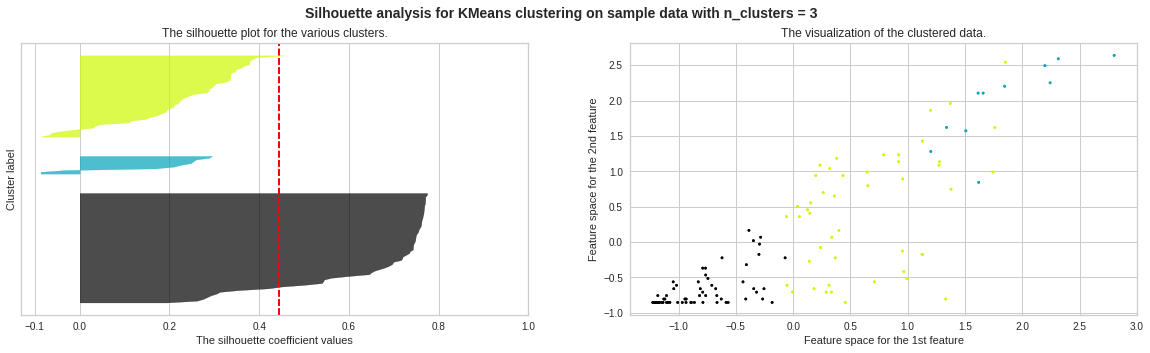

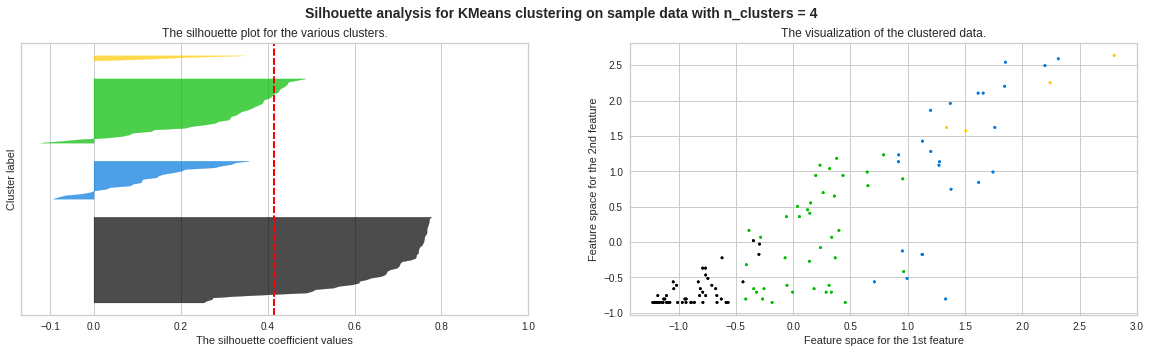

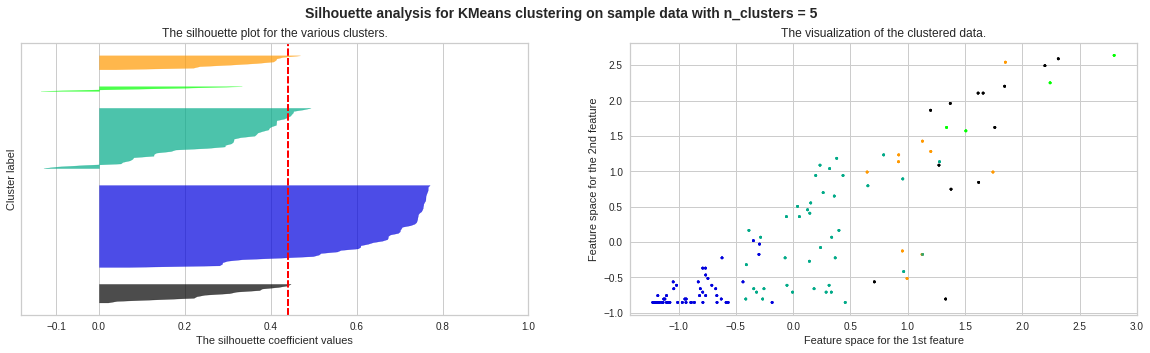

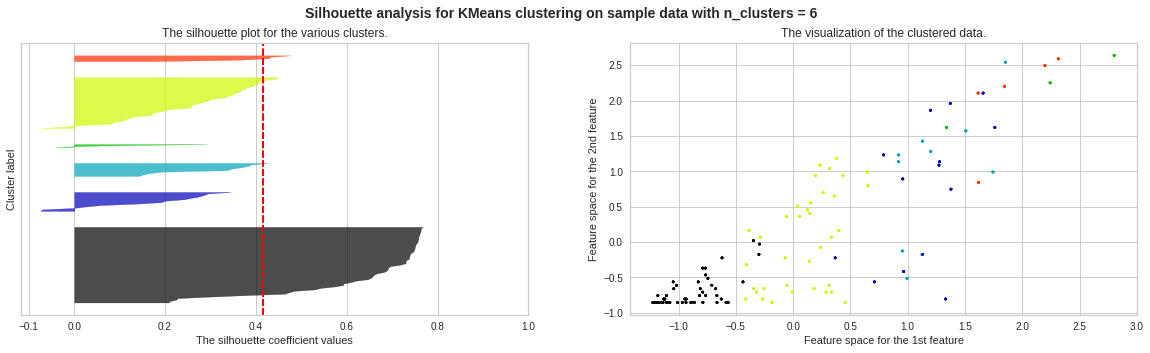

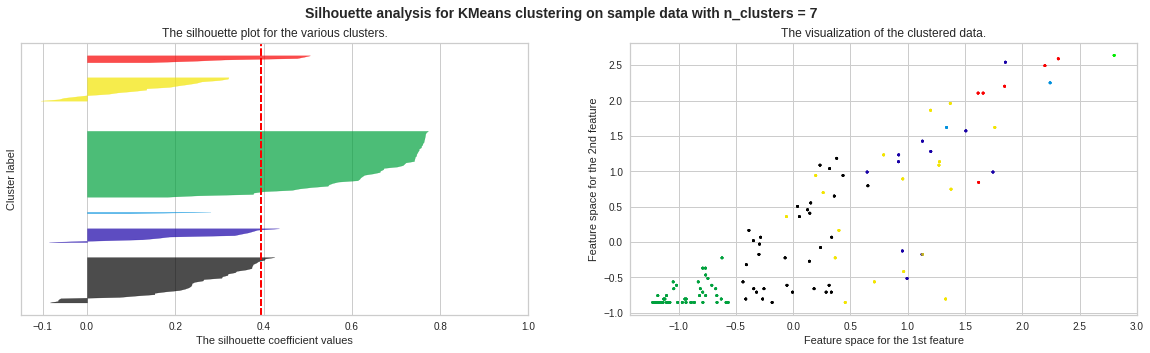

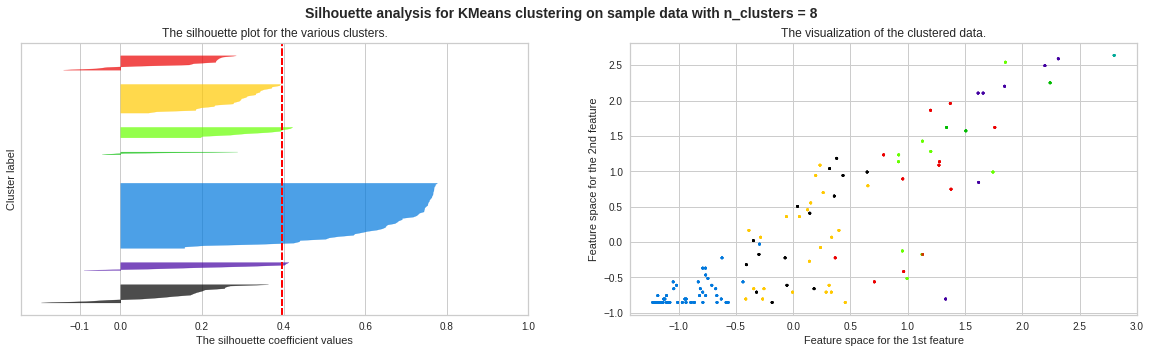

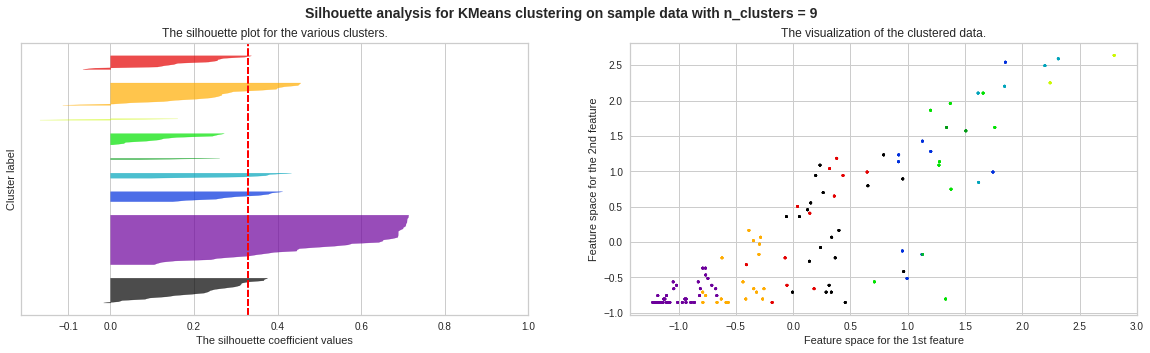

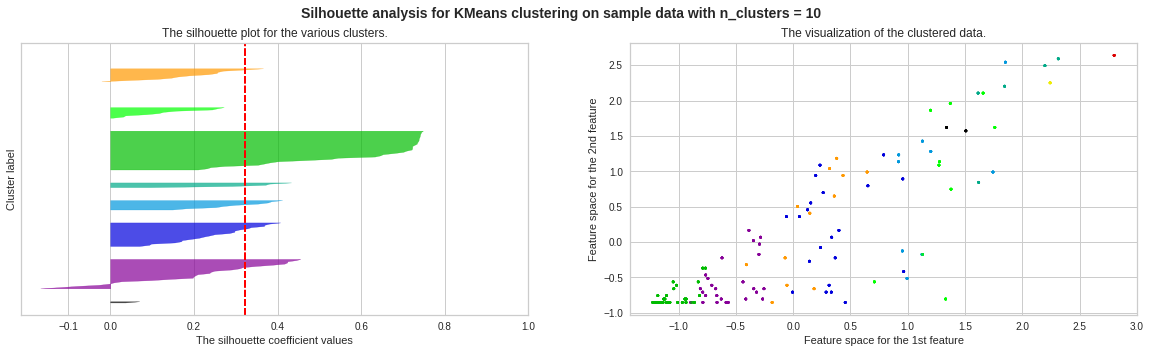

In [ ]:
NBA_Players_C,NBA_2021_C = NBA_Clusters(NBA_2021_C,4)

In [ ]:
NBA_Players_C.head()

G        GS        MP        FG       FGA  \
Player            Tm                                                      
Steven Adams      NOP  1.024797  1.960749  1.371858  0.380811  0.231004   
Bam Adebayo       MIA  1.297125  2.251973  2.243452  2.370922  2.263843   
LaMarcus Aldridge SAS -0.654564  0.019254 -0.347028 -0.170755 -0.016903   
                  BRK -1.380775 -0.611731 -1.017734 -0.841579 -0.843260   
Jarrett Allen     BRK -1.063058 -0.611731 -0.709922 -0.699961 -0.773020   

                             3P       3PA        2P       2PA        FT  \
Player            Tm                                                      
Steven Adams      NOP -0.579989 -0.586231  0.557615  0.494866  0.018885   
Bam Adebayo       MIA -0.509880 -0.519789  2.742358  2.904269  3.164333   
LaMarcus Aldridge SAS  0.366476  0.370540 -0.275060 -0.158195 -0.390165   
                  BRK -0.439772 -0.559654 -0.827429 -0.801362 -0.686373   
Jarrett Allen     BRK -0.579989 -0.626097 -0.637810 -0.692519 -0.178587   

                            FTA       ORB       DRB       TRB       AST  \
Player            Tm                                                      
Steven Adams      NOP  0.593253  2.124048  0.935504  1.334945  0.818403   
Bam Adebayo       MIA  3.024149  1.069207  1.810020  1.614209  4.111353   
LaMarcus Aldridge SAS -0.494546 -0.787908 -0.571354 -0.653038 -0.232539   
                  BRK -0.794245 -1.010762 -0.941342 -0.984368 -0.554828   
Jarrett Allen     BRK -0.228146 -0.475913 -0.504084 -0.506306 -0.456740   

                            STL       BLK       TOV        PF       PTS  
Player            Tm                                                     
Steven Adams      NOP  1.923488  0.100162  0.977516  0.604646  0.250338  
Bam Adebayo       MIA  3.109219  0.900515  3.326070  1.153191  2.434939  
LaMarcus Aldridge SAS -0.673828 -0.471519 -0.519365 -0.715290 -0.181402  
                  BRK -0.956144 -0.671607 -0.854873 -1.143841 -0.826133  
Jarrett Allen     BRK -0.730291 -0.442934 -0.467749 -0.972420 -0.624654

In [ ]:
NBA_Players_C = NBA_Players_C.drop(['clusters'],axis=1)


In [ ]:
data_pca_c = pd.DataFrame(pca.transform(NBA_Players_C),
                        columns=["PC1", "PC2"],
                        index=NBA_Players_C.index)

data_pca_c

PC1       PC2
Player            Tm                     
Steven Adams      NOP  3.256649  1.822621
Bam Adebayo       MIA  9.432439  0.339391
LaMarcus Aldridge SAS -1.452558 -1.140440
                  BRK -3.745176 -0.588209
Jarrett Allen     BRK -2.681910 -0.012531
...                         ...       ...
Robert Williams   BOS  1.476109  1.783362
James Wiseman     GSW  0.745911  0.104891
Christian Wood    HOU  4.518370 -1.626303
Cody Zeller       CHO  1.401134  0.504867
Ivica Zubac       LAC  4.031682  2.143605

[121 rows x 2 columns]

In [ ]:
NBA_2021_C['clusters'] = model.predict(NBA_Players_C)

In [ ]:
data_pca_c['clusters'] = model.predict(NBA_Players_C)

In [ ]:
NBA_Players_C['clusters'] = model.predict(NBA_Players_C)

In [ ]:
NBA_Players_C

G        GS        MP        FG       FGA  \
Player            Tm                                                      
Steven Adams      NOP  1.024797  1.960749  1.371858  0.380811  0.231004   
Bam Adebayo       MIA  1.297125  2.251973  2.243452  2.370922  2.263843   
LaMarcus Aldridge SAS -0.654564  0.019254 -0.347028 -0.170755 -0.016903   
                  BRK -1.380775 -0.611731 -1.017734 -0.841579 -0.843260   
Jarrett Allen     BRK -1.063058 -0.611731 -0.709922 -0.699961 -0.773020   
...                         ...       ...       ...       ...       ...   
Robert Williams   BOS  0.752468 -0.223432  0.367419  0.358450  0.024415   
James Wiseman     GSW  0.162422  0.456091  0.126030  0.395718  0.478912   
Christian Wood    HOU  0.253198  1.135614  0.919861  1.424315  1.602757   
Cody Zeller       CHO  0.570915  0.164867  0.399821  0.321182  0.297113   
Ivica Zubac       LAC  1.660230  0.747315  1.378339  0.887656  0.586338   

                             3P       3PA        2P       2PA        FT  ...  \
Player            Tm                                                     ...   
Steven Adams      NOP -0.579989 -0.586231  0.557615  0.494866  0.018885  ...   
Bam Adebayo       MIA -0.509880 -0.519789  2.742358  2.904269  3.164333  ...   
LaMarcus Aldridge SAS  0.366476  0.370540 -0.275060 -0.158195 -0.390165  ...   
                  BRK -0.439772 -0.559654 -0.827429 -0.801362 -0.686373  ...   
Jarrett Allen     BRK -0.579989 -0.626097 -0.637810 -0.692519 -0.178587  ...   
...                         ...       ...       ...       ...       ...  ...   
Robert Williams   BOS -0.579989 -0.599520  0.532882  0.252442 -0.192693  ...   
James Wiseman     GSW -0.159338 -0.121134  0.475172  0.618552 -0.065746  ...   
Christian Wood    HOU  2.119189  2.111332  1.077007  1.133086  0.935719  ...   
Cody Zeller       CHO -0.439772 -0.254019  0.458684  0.450340  0.371513  ...   
Ivica Zubac       LAC -0.544934 -0.572943  1.109984  0.915399  1.076771  ...   

                            ORB       DRB       TRB       AST       STL  \
Player            Tm                                                      
Steven Adams      NOP  2.124048  0.935504  1.334945  0.818403  1.923488   
Bam Adebayo       MIA  1.069207  1.810020  1.614209  4.111353  3.109219   
LaMarcus Aldridge SAS -0.787908 -0.571354 -0.653038 -0.232539 -0.673828   
                  BRK -1.010762 -0.941342 -0.984368 -0.554828 -0.956144   
Jarrett Allen     BRK -0.475913 -0.504084 -0.506306 -0.456740 -0.730291   
...                         ...       ...       ...       ...       ...   
Robert Williams   BOS  0.935495  0.424249  0.596551  0.580189  1.302391   
James Wiseman     GSW -0.223345  0.060988 -0.028243 -0.372664 -0.504437   
Christian Wood    HOU  0.088650  1.056591  0.771683  0.257900  0.794221   
Cody Zeller       CHO  0.727498  0.316616  0.454552  0.468089  0.398977   
Ivica Zubac       LAC  1.767482  1.130588  1.358611  0.524139  0.229587   

                            BLK       TOV        PF       PTS  clusters  
Player            Tm                                                     
Steven Adams      NOP  0.100162  0.977516  0.604646  0.250338         3  
Bam Adebayo       MIA  0.900515  3.326070  1.153191  2.434939         4  
LaMarcus Aldridge SAS -0.471519 -0.519365 -0.715290 -0.181402         0  
                  BRK -0.671607 -0.854873 -1.143841 -0.826133         0  
Jarrett Allen     BRK -0.442934 -0.467749 -0.972420 -0.624654         0  
...                         ...       ...       ...       ...       ...  
Robert Williams   BOS  1.615116  0.306500  0.467510  0.189894         2  
James Wiseman     GSW  0.042994  0.512966  0.741782  0.279120         2  
Christian Wood    HOU  0.386003  1.029132  0.176095  1.464964         1  
Cody Zeller       CHO -0.500103  0.280692  0.741782  0.287755         2  
Ivica Zubac       LAC  0.786179  1.054941  1.873156  0.860529         3  

[121 rows x 21 columns]

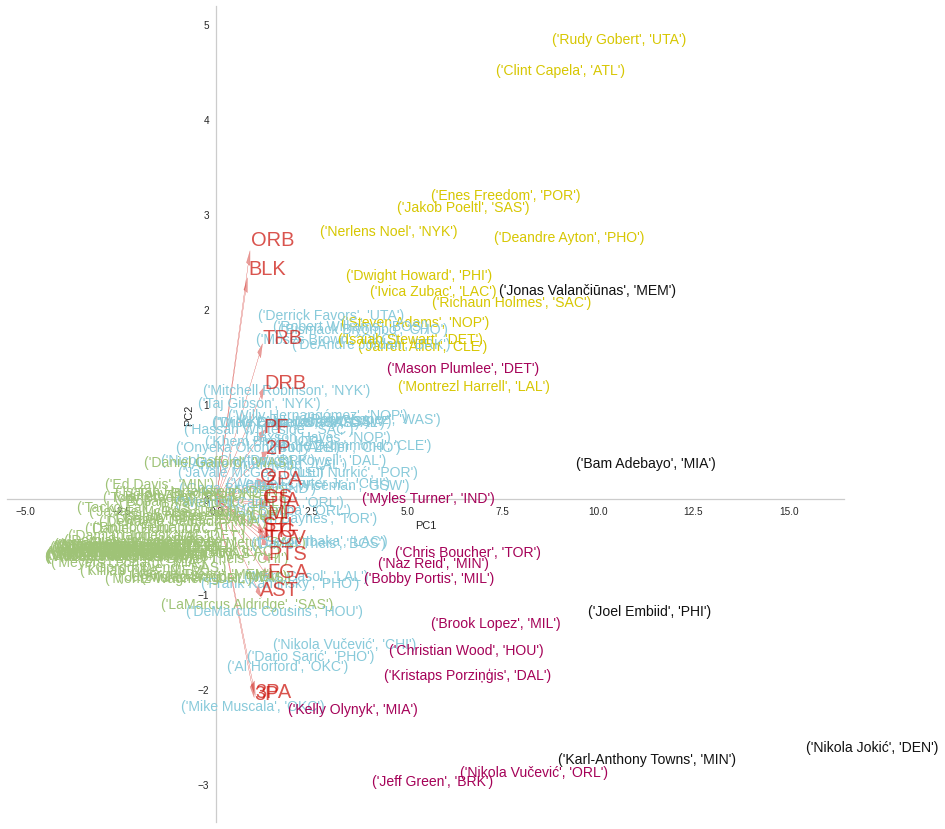

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(15, 15))


ax.spines["left"].set_position("zero")
ax.spines["bottom"].set_position("zero")

ax.spines["right"].set_color("none")
ax.spines["top"].set_color("none")
ax.grid(False)
sns.scatterplot(data=data_pca_c, x="PC1", y="PC2", ax=ax, alpha=0)

#clusters = model.predict(NBA_Players)


colors = ['g', 'm', 'c', 'y','k']

for idx in range(data_pca_c.shape[0]):
    color = colors[data_pca_c['clusters'][idx]]
    ax.text(x=data_pca_c.PC1[idx], y=data_pca_c.PC2[idx], s=data_pca_c.index[idx],
            fontdict={'color': color, 'fontsize':14})
    

def plot_components(coeff, ax, labels):
    """
    Plot variables importance by component
    """
    for idx in range(coeff.shape[0]):
        ax.arrow(0, 0, coeff[idx, 0] * 5, coeff[idx, 1] *5, head_width=.1, color='r', alpha=0.4)
        ax.text(coeff[idx, 0] * 5.4, coeff[idx, 1] * 5.4 , s=labels[idx],
                fontdict={'color': 'r', 'fontsize':20}, alpha=0.7)

plot_components(pca.components_.T, ax, NBA_Players.columns)

## Caso NBA 2020-21 - Ofensivos

In [ ]:
NBA_2021_Off = NBA_2021.drop(['clusters'],axis=1)

In [ ]:
NBA_2021_Off.columns

In [ ]:
NBA_Players_Off,NBA_2021_Off = NBA_Clusters_Off(NBA_2021_Off,5)

In [ ]:
sns.scatterplot(x='ORBG', y='Pos', data=NBA_2021_Off, hue='clusters')
plt.show()

In [ ]:
NBA_2021_Off[NBA_2021_Off['Tm'] == 'GSW']['clusters'].value_counts()

In [ ]:
NBA_2021_Off.loc[NBA_2021_Off['Tm'] == 'DEN'][NBA_2021_Off['clusters'] == 4]

## Caso NBA 2020-21 - Defensores

In [ ]:
NBA_2021_Def = NBA_2021.drop(['clusters'],axis=1)

In [ ]:
NBA_2021_Def.columns

In [ ]:
NBA_Players_Def,NBA_2021_Def = NBA_Clusters_Def(NBA_2021_Def,4)

In [ ]:
sns.scatterplot(x='DRB', y='Pos', data=NBA_2021_Def, hue='clusters')
plt.show()

In [ ]:
NBA_2021_Def.loc[NBA_2021_Def['Tm'] == 'DEN']['clusters'].value_counts()

In [ ]:
NBA_2021_Def.loc[NBA_2021_Def['Tm'] == 'DEN'][NBA_2021_Def['clusters'] == 3]

## Escolha dos Clusters

### **Estudo Clusterizacao**

In [ ]:
import matplotlib
%matplotlib inline

In [ ]:
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(NBA_Players)
  wcss.append(kmeans.inertia_)

In [ ]:
wcss

In [ ]:
plt.plot(range(1,11),wcss)
plt.title('Metodo Elbow')
plt.show()

In [ ]:
from sklearn import metrics

In [ ]:
NBA_Test = NBA_Players.iloc[:,:-1].values

In [ ]:
NBA_Test

In [ ]:
kmeans = KMeans(n_clusters=5)
ytestkmeans = kmeans.fit_predict(NBA_Test)

In [ ]:
NBA_Players

In [ ]:
# ARI
metrics.adjusted_rand_score(NBA_Players['clusters'],ytestkmeans)

In [ ]:
# AMI
metrics.adjusted_mutual_info_score(NBA_Players['clusters'],ytestkmeans)

In [ ]:
#Integridade
metrics.completeness_score(NBA_Players['clusters'],ytestkmeans)

In [ ]:
#Homogeneidade
metrics.homogeneity_score(NBA_Players['clusters'],ytestkmeans)

In [ ]:
NBA_Players_2 =  NBA_Players.iloc[:,:-1].corr()

In [ ]:
NBA_Players_2.columns

In [ ]:
selected_var = {}
cols = list(NBA_Players_2.columns)
while(len(selected_var) < 8):
  res = []
  for col in cols:
      scols =[]
      scols.extend(selected_var)
      scols.append(col)
      kmeans = KMeans(n_clusters=5)
      yHat = kmeans.fit_predict(NBA_Players_2[scols])
      res.append(silhouette_score(NBA_Players_2[scols],yHat))
  var_max = cols[np.argmax(res)]
  selected_var[var_max] = max(res)
  cols.remove(var_max)
selected_var

In [ ]:
sorted(selected_var.items(), key=lambda x: x[1],reverse=True)

### Escolho Dos Clusters - Método Random Forest - GERAL

In [ ]:
NBA_Players['Binary Cluster 0'] = NBA_Players['clusters'].map({0:1, 1:0, 2:0, 3:0, 4:0})

In [ ]:
NBA_Players['Binary Cluster 1'] = NBA_Players['clusters'].map({0:0, 1:1, 2:0, 3:0, 4:0})

In [ ]:
NBA_Players['Binary Cluster 2'] = NBA_Players['clusters'].map({0:0, 1:0, 2:1, 3:0, 4:0})

In [ ]:
NBA_Players['Binary Cluster 3'] = NBA_Players['clusters'].map({0:0, 1:0, 2:0, 3:1, 4:0})

In [ ]:
NBA_Players['Binary Cluster 4'] = NBA_Players['clusters'].map({0:0, 1:0, 2:0, 3:0, 4:1})

In [ ]:
NBA_Players.iloc[:,1:8]

,,GS,MP,FG,FGA,3P,3PA,2P
Player,Tm,,,,,,,
Precious Achiuwa,MIA,-0.602447,-0.139321,-0.124693,-0.253517,-0.829659,-0.876711,0.227760
Jaylen Adams,MIL,-0.784285,-1.182081,-0.967188,-0.977057,-0.829659,-0.869314,-0.866186
Steven Adams,NOP,1.852365,1.119533,0.320529,0.009588,-0.829659,-0.861917,0.805861
Bam Adebayo,MIA,2.125122,1.899791,2.149360,1.627685,-0.791787,-0.824933,3.162736
LaMarcus Aldridge,SAS,0.033986,-0.419227,-0.186339,-0.187741,-0.318378,-0.329340,-0.092420
...,...,...,...,...,...,...,...,...
Delon Wright,SAC,-0.420609,-0.198783,-0.261684,-0.263384,-0.204760,-0.270165,-0.243615
Thaddeus Young,CHI,0.261283,1.187697,1.560298,1.173829,-0.602423,-0.551247,2.308925
Trae Young,ATL,2.079663,1.873686,2.361696,2.653796,1.745681,2.052466,2.246668


In [ ]:
evalFeatures(NBA_Players, 'Binary Cluster 0',-6)

[('FG', 0.17289765325856574),
 ('MP', 0.1611489387007886),
 ('PTS', 0.15508852261442166),
 ('FGA', 0.12242849873906475),
 ('DRB', 0.09323301765712838),
 ('PF', 0.07431979214267581),
 ('TRB', 0.06525724576854035),
 ('TOV', 0.04986912494323633),
 ('STL', 0.02454300583372517),
 ('G', 0.02407772320082237),
 ('2P', 0.0173171899832565),
 ('AST', 0.010460062974916333),
 ('2PA', 0.009318583273927216),
 ('ORB', 0.004542084917366912),
 ('3PA', 0.0035547661265978915),
 ('3P', 0.0032892772737554516),
 ('FT', 0.0025390246785431904),
 ('FTA', 0.002494527357907259),
 ('GS', 0.0018341093045869967),
 ('BLK', 0.0017868512501731052)]

In [ ]:
evalFeatures(NBA_Players, 'Binary Cluster 1',-6)

[('FGA', 0.18864402626321927),
 ('PTS', 0.1278891500625396),
 ('FG', 0.08937550515787968),
 ('2PA', 0.07954975037159501),
 ('3PA', 0.07291510966183883),
 ('3P', 0.07253355168701557),
 ('2P', 0.05709292446709958),
 ('MP', 0.04687389521990507),
 ('TOV', 0.04251128227926459),
 ('FTA', 0.036044660144150996),
 ('ORB', 0.03306612961340434),
 ('AST', 0.028350219198043192),
 ('GS', 0.025208555455645532),
 ('FT', 0.022006730588272436),
 ('TRB', 0.017830940215446817),
 ('BLK', 0.017433498382606865),
 ('DRB', 0.014938770209595718),
 ('PF', 0.012538478693005057),
 ('STL', 0.01006836092406697),
 ('G', 0.005128461405404873)]

In [ ]:
evalFeatures(NBA_Players, 'Binary Cluster 2',-6)

[('PTS', 0.1672980427736323),
 ('FG', 0.13004287058537747),
 ('FGA', 0.11803111303282746),
 ('MP', 0.11508506300786354),
 ('DRB', 0.07783846234157935),
 ('TRB', 0.052493213593448385),
 ('2PA', 0.050451933397697615),
 ('TOV', 0.042519996662157354),
 ('PF', 0.03226369330447546),
 ('G', 0.03186841090710704),
 ('2P', 0.03163706421688945),
 ('GS', 0.021693016956279256),
 ('FT', 0.021569993951588626),
 ('STL', 0.01952146782036404),
 ('BLK', 0.018979188096899056),
 ('3PA', 0.015156669683135218),
 ('ORB', 0.015119866831791466),
 ('3P', 0.014344412198468796),
 ('FTA', 0.012386678853305143),
 ('AST', 0.01169884178511307)]

In [ ]:
evalFeatures(NBA_Players, 'Binary Cluster 3',-6)

[('ORB', 0.2826935604090574),
 ('BLK', 0.12103663978129842),
 ('3PA', 0.06655458953450011),
 ('TRB', 0.06480142199163075),
 ('3P', 0.05976102075012786),
 ('DRB', 0.055892528360811586),
 ('AST', 0.041118740508692526),
 ('2P', 0.03840713447160015),
 ('PF', 0.03411739354999834),
 ('FGA', 0.03265542170257598),
 ('TOV', 0.03250390434355772),
 ('PTS', 0.026139908765897942),
 ('FT', 0.024725705317962882),
 ('2PA', 0.022021313676827067),
 ('MP', 0.02134871318702832),
 ('FTA', 0.02086845788745002),
 ('G', 0.017134900416450088),
 ('STL', 0.015997975930382356),
 ('FG', 0.012670663593641534),
 ('GS', 0.00955000582050888)]

In [ ]:
evalFeatures(NBA_Players, 'Binary Cluster 4',-6)

[('PTS', 0.1683313747987848),
 ('FG', 0.16782595628758049),
 ('FT', 0.15215092108309847),
 ('FGA', 0.10698440431798296),
 ('2PA', 0.09829071617657455),
 ('FTA', 0.09664965482767526),
 ('2P', 0.053379577459899956),
 ('TOV', 0.04897251596091671),
 ('AST', 0.03388392577278149),
 ('MP', 0.022829801615588077),
 ('STL', 0.012208210470887368),
 ('GS', 0.010963135699246604),
 ('ORB', 0.005402872027169592),
 ('3PA', 0.003637726304539362),
 ('3P', 0.0036162700283288354),
 ('DRB', 0.003593020131088987),
 ('G', 0.003405043257258955),
 ('PF', 0.0031133226483560233),
 ('BLK', 0.002900135978895652),
 ('TRB', 0.0018614151533457612)]

### Escolho Dos Clusters - Método Random Forest - PIVO

In [ ]:
NBA_Players_C['Binary Cluster 0'] = NBA_Players_C['clusters'].map({0:1, 1:0, 2:0, 3:0})

In [ ]:
NBA_Players_C['Binary Cluster 1'] = NBA_Players_C['clusters'].map({0:0, 1:1, 2:0, 3:0})

In [ ]:
NBA_Players_C['Binary Cluster 2'] = NBA_Players_C['clusters'].map({0:0, 1:0, 2:1, 3:0})

In [ ]:
NBA_Players_C['Binary Cluster 3'] = NBA_Players_C['clusters'].map({0:0, 1:0, 2:0, 3:1})

In [ ]:
NBA_Players_C

In [ ]:
evalFeatures(NBA_Players_C, 'Binary Cluster 0',-5)

In [ ]:
evalFeatures(NBA_Players_C, 'Binary Cluster 1',-5)

In [ ]:
evalFeatures(NBA_Players_C, 'Binary Cluster 2',-5)

In [ ]:
evalFeatures(NBA_Players_C, 'Binary Cluster 3',-5)

In [ ]:
NBA_2021_C[NBA_2021_C['clusters']==2]

In [ ]:
NBA_2021_C[NBA_2021_C['Tm']=='LAL']

### Escolho Dos Clusters - Método Random Forest - OFENSIVO

In [ ]:
NBA_Players_Off['Binary Cluster 0'] = NBA_Players_Off['clusters'].map({0:1, 1:0, 2:0, 3:0, 4:0})

In [ ]:
NBA_Players_Off['Binary Cluster 1'] = NBA_Players_Off['clusters'].map({0:0, 1:1, 2:0, 3:0, 4:0})

In [ ]:
NBA_Players_Off['Binary Cluster 2'] = NBA_Players_Off['clusters'].map({0:0, 1:0, 2:1, 3:0, 4:0})

In [ ]:
NBA_Players_Off['Binary Cluster 3'] = NBA_Players_Off['clusters'].map({0:0, 1:0, 2:0, 3:1, 4:0})

In [ ]:
NBA_Players_Off['Binary Cluster 4'] = NBA_Players_Off['clusters'].map({0:0, 1:0, 2:0, 3:0, 4:1})

In [ ]:
evalFeatures(NBA_Players_Off, 'Binary Cluster 0',-6)

In [ ]:
evalFeatures(NBA_Players_Off, 'Binary Cluster 1',-6)

In [ ]:
evalFeatures(NBA_Players_Off, 'Binary Cluster 2',-6)

In [ ]:
evalFeatures(NBA_Players_Off, 'Binary Cluster 3',-6)

In [ ]:
evalFeatures(NBA_Players_Off, 'Binary Cluster 4',-6)

In [ ]:
NBA_2021_Off[NBA_2021_Off['clusters']==4][NBA_2021_Off['Tm'] == 'LAL']

### Escolho Dos Clusters - Método Random Forest - DEFENSIVO

In [ ]:
NBA_Players_Def['Binary Cluster 0'] = NBA_Players_Def['clusters'].map({0:1, 1:0, 2:0, 3:0})

In [ ]:
NBA_Players_Def['Binary Cluster 1'] = NBA_Players_Def['clusters'].map({0:0, 1:1, 2:0, 3:0})

In [ ]:
NBA_Players_Def['Binary Cluster 2'] = NBA_Players_Def['clusters'].map({0:0, 1:0, 2:1, 3:0})

In [ ]:
NBA_Players_Def['Binary Cluster 3'] = NBA_Players_Def['clusters'].map({0:0, 1:0, 2:0, 3:1})

In [ ]:
NBA_Players_Def.columns

In [ ]:
evalFeatures(NBA_Players_Def, 'Binary Cluster 0',-5)

In [ ]:
evalFeatures(NBA_Players_Def, 'Binary Cluster 1',-5)

In [ ]:
evalFeatures(NBA_Players_Def, 'Binary Cluster 2',-5)

In [ ]:
evalFeatures(NBA_Players_Def, 'Binary Cluster 3',-5)

In [ ]:
NBA_2021_Def[NBA_2021_Def['clusters']==0][NBA_2021_Def['Tm'] == 'LAL']

## CONCLUSAO DOS CLUSTERS

### **Clusters Utilizados - NO GERAL:**
## CLUSTER 0 - BANCO DE RESERVA
## CLUSTER 1 - COADJUVANTES
## CLUSTER 2 - CRAQUES DO TIME
## CLUSTER 3 - ENTRAM ALGUNS JOGOS
## CLUSTER 4 - IMPORTANTES PARA O TIME


---
---



### **Clusters Utilizados - PIVO:**
## CLUSTER 0 - IMPORTANTES PARA O TIME  
## CLUSTER 1 - COADJUVANTES
## CLUSTER 2 - BANCO DE RESERVA
## CLUSTER 3 - PIVOS ESTRELAS


---
---


### **Clusters Utilizados - OFENSIVA:**
## CLUSTER 0 - BANCO DE RESERVA
## CLUSTER 1 - ESTRELAS OFENSIVA
## CLUSTER 2 - PARTICIPACAO MEDIA OFENSIVA 
## CLUSTER 3 - PARTICIPACAO BOA OFENSIVA
## CLUSTER 4 - PARTICIPACAO BAIXA OFENSIVA
---
---
---

### **Clusters Utilizados - DEFENSIVA:**
## CLUSTER 0 - PARTICIPACAO BOA DEFENSIVA
## CLUSTER 1 - BANCO RESERVA
## CLUSTER 2 - PARTICIPACAO BAIXA DEFENSIVA
## CLUSTER 3 - ESTRELAS DEFENSIVAS
## CLUSTER 4 - PARTICIPACAO NORMAL DEFENSIVA

---
---

#**OBS: O MVP FAZ PARTE DO CLUSTER COMO ESTRELA EM TODAS AS ANALISES FEITAS**


# **Caso NBA 1999-00**

**RESUMO DA TEMPORADA 1999-00**

---


*   League Champion: Los Angeles Lakers
*   Most Valuable Player: Shaquille O'Neal (29.7/13.6/3.8)
*   Rookie of the Year: Elton Brand (20.1/10.0/1.9), Steve Francis (18.0/5.3/6.6)
*   PPG Leader: Shaquille O'Neal (29.7)
*   RPG Leader: Dikembe Mutombo (14.1)
*   APG Leader: Jason Kidd (10.1)


## Caso NBA 1999-00 - Leitura do Arquivo

In [ ]:
NBA_2000 = pd.read_csv('/content/drive/MyDrive/Pós-Graduação/Projeto/99-2000.csv', sep=",")


In [ ]:
NBA_2021_app = pd.read_csv('/content/drive/MyDrive/Pós-Graduação/Projeto/2020-21.csv', sep=",")

*   Rk - Ranking de acordo com o Basketball Reference
*   Player - Nome do Jogador
*   Nickname - Código do Jogador
*   Pos - Posição do Jogador
*   Age - Idade do Jogador
*   Tm - Time do Jogador
*   G - Jogos pelo Jogador
*   GS - Jogos Começado pelo Jogador
*   MP - Minutos jogador pelo Jogador
*   FG - Arremessos acertados
*   FGA - Tentativa de Arremessos
*   FG% - Porcentagem de Acertos de arremessos
*   3P - Arremessos acertados de 3 pts
*   3PA - Tentativa de Arremessos de 3 pts
*   3P% - Porcentagem de Acertos de 3 pts
*   2P - Arremessos acertados de 2pts
*   2PA - Tentativa de Arremessos de 2pts
*   2P% - Porcentagem de Acertos de 2pts
*   eFG% - Porcentagem de acertos efetivos levando em consideração o valor de 3 pts e 2 pts
*   FT - Acertos de Lance Livre
*   FTA - Tentativa de Lance Livre
*   FT% - Porcentagem de Lance Livre
*   ORB - Rebotes ofensivos
*   DRB - Rebotes defensivos
*   TRB - Total de Rebotes
*   AST - Total de Assistencia
*   STL - Roubos de Bola
*   BLK - Bloqueios
*   TOV - Turnovers (Perdas de Jogadas)
*   PF - Faltas pessoais
*   PTS - Total de Pontos
*   Season - Temporada jogada

### JOGADORES COMPARADOS EM 2000

In [ ]:
Players_2020 = [18,329,221,120,136]

In [ ]:
NBA_2000 = NBA_2000.append(NBA_2021_app.loc[Players_2020],ignore_index=True)

In [ ]:
NBA_2000.tail()

## Caso NBA 1999-00 - Ajustes de Posicao

In [ ]:
NBA_2000['Pos'].value_counts()

In [ ]:
dictPos = {
    'SG': 'SG',
    'PF': 'PF',
    'C': 'C',
    'PG': 'PG',
    'SF': 'SF',
    'PF-SF': 'PF',
    'SF-PF': 'SF',
    'SF-SG':'SF'
}

In [ ]:
NBA_2000['Pos'] = NBA_2000['Pos'].map(dictPos)

In [ ]:
NBA_2000 = NBA_2000.loc[NBA_2000['Tm'] != 'TOT']

## Caso NBA 1999-00 - Clusterizacao


In [ ]:
NBA_Players_00,NBA_2000 = NBA_Clusters(NBA_2000,5)

## Caso NBA 1999-00 - Analise Cluster

In [ ]:
sns.scatterplot(x='PPG', y='Pos', data=NBA_2000, hue='clusters')
plt.show()

In [ ]:
sns.scatterplot(x='PPG', y='3PG', data=NBA_Players_00, hue='clusters')
plt.show()

In [ ]:
NBA_2000.loc[NBA_2000['Tm'] == 'LAL'][NBA_2000['clusters'] == 4]

In [ ]:
NBA_2000['clusters'].value_counts()

## Caso NBA 1999-00 - Estudo do Pivo


In [ ]:
NBA_2000_C = NBA_2000.iloc[:,:-1]

In [ ]:
NBA_2000_C = NBA_2000.loc[NBA_2000['Pos'] == 'C']

In [ ]:
NBA_2000_C.head()

In [ ]:
NBA_Players_00_C,NBA_2000_C = NBA_Clusters(NBA_2000_C,4)

In [ ]:
NBA_Players_00_C.head()

In [ ]:
sns.scatterplot(x='3PG', y='G', data=NBA_2000_C, hue='clusters')
plt.show()

In [ ]:
sns.scatterplot(x='PPG', y='G', data=NBA_2021_C, hue='clusters')
plt.show()

## Caso NBA 1999-00 - Ofensivos

In [ ]:
NBA_2000_Off = NBA_2000.iloc[:,:-1]

In [ ]:
NBA_2000_Off.columns

In [ ]:
NBA_Players00_Off,NBA_2000_Off = NBA_Clusters_Off(NBA_2000_Off,5)

## Caso NBA 1999-00 - Defensivo

In [ ]:
NBA_2000_Def = NBA_2000.iloc[:,:-1]

In [ ]:
NBA_2000_Def.columns

In [ ]:
NBA_Players00_Def,NBA_2000_Def = NBA_Clusters_Def(NBA_2000_Def,5)

In [ ]:
NBA_2000_Def['clusters'].value_counts()

## Caso NBA 1999-00  - Escolha Clusters

### **Estudo Clusterizacao**

In [ ]:
NBA_Players_00_2 =  NBA_Players.iloc[:,:-6].corr()

In [ ]:
selected_var = {}
cols = list(NBA_Players_00_2.columns)
while(len(selected_var) < 8):
  res = []
  for col in cols:
      scols =[]
      scols.extend(selected_var)
      scols.append(col)
      kmeans = KMeans(n_clusters=5)
      yHat = kmeans.fit_predict(NBA_Players_00_2[scols])
      res.append(silhouette_score(NBA_Players_00_2[scols],yHat))
  var_max = cols[np.argmax(res)]
  selected_var[var_max] = max(res)
  cols.remove(var_max)
selected_var

In [ ]:
sorted(selected_var.items(), key=lambda x: x[1],reverse=True)

### Escolha Dos Clusters - Método Random Forest - GERAL

In [ ]:
NBA_Players_00['Binary Cluster 0'] = NBA_Players_00['clusters'].map({0:1, 1:0, 2:0, 3:0, 4:0})

In [ ]:
NBA_Players_00['Binary Cluster 1'] = NBA_Players_00['clusters'].map({0:0, 1:1, 2:0, 3:0, 4:0})

In [ ]:
NBA_Players_00['Binary Cluster 2'] = NBA_Players_00['clusters'].map({0:0, 1:0, 2:1, 3:0, 4:0})

In [ ]:
NBA_Players_00['Binary Cluster 3'] = NBA_Players_00['clusters'].map({0:0, 1:0, 2:0, 3:1, 4:0})

In [ ]:
NBA_Players_00['Binary Cluster 4'] = NBA_Players_00['clusters'].map({0:0, 1:0, 2:0, 3:0, 4:1})

In [ ]:
evalFeatures(NBA_Players_00, 'Binary Cluster 0',-6)

In [ ]:
evalFeatures(NBA_Players_00, 'Binary Cluster 1',-6)

In [ ]:
evalFeatures(NBA_Players_00, 'Binary Cluster 2',-6)

In [ ]:
evalFeatures(NBA_Players_00, 'Binary Cluster 3',-6)

In [ ]:
evalFeatures(NBA_Players_00, 'Binary Cluster 4',-6)

In [ ]:
NBA_2000.loc[NBA_2000['Tm'] == 'LAL'][NBA_2000['SEASON'] == 2020]

### Escolha Dos Clusters - Método Random Forest - PIVO

In [ ]:
NBA_Players_00_C['Binary Cluster 0'] = NBA_Players_00_C['clusters'].map({0:1, 1:0, 2:0, 3:0 }) #, 4:0})

In [ ]:
NBA_Players_00_C['Binary Cluster 1'] = NBA_Players_00_C['clusters'].map({0:0, 1:1, 2:0, 3:0}) #, 4:0})

In [ ]:
NBA_Players_00_C['Binary Cluster 2'] = NBA_Players_00_C['clusters'].map({0:0, 1:0, 2:1, 3:0}) #, 4:0})

In [ ]:
NBA_Players_00_C['Binary Cluster 3'] = NBA_Players_00_C['clusters'].map({0:0, 1:0, 2:0, 3:1}) # , 4:0})

In [ ]:
evalFeatures(NBA_Players_00_C, 'Binary Cluster 0',-6)

In [ ]:
evalFeatures(NBA_Players_00_C, 'Binary Cluster 1',-6)

In [ ]:
evalFeatures(NBA_Players_00_C, 'Binary Cluster 2',-6)

In [ ]:
evalFeatures(NBA_Players_00_C, 'Binary Cluster 3',-6)

In [ ]:
NBA_2000_C.loc[NBA_2000_C['clusters'] == 3]

In [ ]:
NBA_2000_C['clusters'].value_counts()

### Escolha Dos Clusters - Método Random Forest - OFENSIVO

In [ ]:
NBA_Players00_Off['Binary Cluster 0'] = NBA_Players00_Off['clusters'].map({0:1, 1:0, 2:0, 3:0, 4:0})

In [ ]:
NBA_Players00_Off['Binary Cluster 1'] = NBA_Players00_Off['clusters'].map({0:0, 1:1, 2:0, 3:0, 4:0})

In [ ]:
NBA_Players00_Off['Binary Cluster 2'] = NBA_Players00_Off['clusters'].map({0:0, 1:0, 2:1, 3:0, 4:0})

In [ ]:
NBA_Players00_Off['Binary Cluster 3'] = NBA_Players00_Off['clusters'].map({0:0, 1:0, 2:0, 3:1 , 4:0})

In [ ]:
NBA_Players00_Off['Binary Cluster 4'] = NBA_Players00_Off['clusters'].map({0:0, 1:0, 2:0, 3:0 , 4:1})

In [ ]:
evalFeatures(NBA_Players00_Off, 'Binary Cluster 0',-6)

In [ ]:
evalFeatures(NBA_Players00_Off, 'Binary Cluster 1',-6)

In [ ]:
evalFeatures(NBA_Players00_Off, 'Binary Cluster 2',-6)

In [ ]:
evalFeatures(NBA_Players00_Off, 'Binary Cluster 3',-6)

In [ ]:
evalFeatures(NBA_Players00_Off, 'Binary Cluster 4',-6)

In [ ]:
NBA_2000_Off.loc[NBA_2000_Off['Tm'] == 'LAL'][NBA_2000_Off['clusters'] == 4]

### Escolha Dos Clusters - Método Random Forest - DEFENSIVO

In [ ]:
NBA_Players00_Def['Binary Cluster 0'] = NBA_Players00_Def['clusters'].map({0:1, 1:0, 2:0, 3:0, 4:0})

In [ ]:
NBA_Players00_Def['Binary Cluster 1'] = NBA_Players00_Def['clusters'].map({0:0, 1:1, 2:0, 3:0, 4:0})

In [ ]:
NBA_Players00_Def['Binary Cluster 2'] = NBA_Players00_Def['clusters'].map({0:0, 1:0, 2:1, 3:0, 4:0})

In [ ]:
NBA_Players00_Def['Binary Cluster 3'] = NBA_Players00_Def['clusters'].map({0:0, 1:0, 2:0, 3:1 , 4:0})

In [ ]:
NBA_Players00_Def['Binary Cluster 4'] = NBA_Players00_Def['clusters'].map({0:0, 1:0, 2:0, 3:0 , 4:1})

In [ ]:
evalFeatures(NBA_Players00_Def, 'Binary Cluster 0',-6)

In [ ]:
evalFeatures(NBA_Players00_Def, 'Binary Cluster 1',-6)

In [ ]:
evalFeatures(NBA_Players00_Def, 'Binary Cluster 2',-6)

In [ ]:
evalFeatures(NBA_Players00_Def, 'Binary Cluster 3',-6)

In [ ]:
evalFeatures(NBA_Players00_Def, 'Binary Cluster 4',-6)

In [ ]:
NBA_2000_Def.loc[NBA_2000_Def['Tm'] == 'LAL'][NBA_2000_Def['clusters'] == 3]

In [ ]:
NBA_2000_Def['clusters'].value_counts()

## Conclusão Clusters

In [ ]:
NBA_2000_Def.loc[NBA_2000_Def['Tm'] == 'LAL'][NBA_2000_Def['clusters'] == 4]

### **Clusters Utilizados - NO GERAL:**
## CLUSTER 0 - ENTRAM BASTANTE NOS JOGOS
## CLUSTER 1 - CRAQUES DO TIME BASEADO NA PARTE DEFENSIVA
## CLUSTER 2 - CRAQUES DO TIME 
## CLUSTER 3 - COADJUVENTES
## CLUSTER 4 - BANCO DE RESERVA


**OBS - NO CLUSTER 3 É CRIADO PARA ESPECIALISTAS EM BOLA DE 3**
---
---
---




### **Clusters Utilizados - PIVO:**
## CLUSTER 0 - BANCO DE RESERVA
## CLUSTER 1 - COADJUVANTES
## CLUSTER 2 - IMPORTANTES PARA O TIME
## CLUSTER 3 - PIVOS ESTRELAS



---
---

### **Clusters Utilizados - OFENSIVA:**
## CLUSTER 0 - BANCO DE RESERVA
## CLUSTER 1 - ESTRELAS OFENSIVA
## CLUSTER 2 - PARTICIPACAO MEDIA OFENSIVA - ESPECIALISTA EM BOLA DE 3
## CLUSTER 3 - PARTICIPACAO BOA OFENSIVA
## CLUSTER 4 - PARTICIPACAO NORMAL OFENSIVA - BASEADA EM REBOTES
---
---

### **Clusters Utilizados - DEFENSIVA:**
## CLUSTER 0 - ESTRELAS DEFENSIVAS
## CLUSTER 1 - PARTICIPACAO BOA DEFENSIVA
## CLUSTER 2 - PARTICIPACAO NORMAL DEFENSIVA
## CLUSTER 3 - BANCO DE RESERVA
## CLUSTER 4 - PARTICIPACAO EXCELENTE DEFENSIVA - BASEADO EM ROUBO DE BOLA


---
---

#**OBS: O MVP FAZ PARTE DO CLUSTER COMO ESTRELA EM TODAS AS ANALISES FEITAS**


# **Caso NBA 1989-90**

**RESUMO DA TEMPORADA 1989-90**

---


*   League Champion: Detroit Pistons
*   Most Valuable Player: Magic Johnson (22.3/6.6/11.5)
*   Rookie of the Year: David Robinson (24.3/12.0/2.0)
*   PPG Leader: Michael Jordan (33.6)
*   RPG Leader: Hakeem Olajuwon (14.0)
*   APG Leader: John Stockton (14.5)


## Caso NBA 1989-90 - Leitura do Arquivo

In [ ]:
NBA_1990 = pd.read_csv('/content/drive/MyDrive/Pós-Graduação/Projeto/89-90.csv', sep=",")


In [ ]:
NBA_1990 = NBA_1990.append(NBA_2021_app.loc[Players_2020],ignore_index=True)

In [ ]:
NBA_2021.loc[Players_2020]

In [ ]:
NBA_1990.loc[NBA_1990['SEASON'] == 2020.0]

## Caso NBA 1989-90 - Ajustes de Posicao

In [ ]:
NBA_1990['Pos'].value_counts()

In [ ]:
dictPos = {
    'SG': 'SG',
    'PF': 'PF',
    'C': 'C',
    'PG': 'PG',
    'SF': 'SF',
    'PF-SF': 'PF',
    'SG-SF': 'SG'
}

In [ ]:
NBA_1990['Pos'] = NBA_1990['Pos'].map(dictPos)

In [ ]:
NBA_2000 = NBA_2000.loc[NBA_2000['Tm'] != 'TOT']

## Caso NBA 1989-90 - Clusterização


In [ ]:
NBA_Players_90,NBA_1990 = NBA_Clusters(NBA_1990,5)

## Caso NBA 1989-90 - Analise Cluster

In [ ]:
sns.scatterplot(x='PPG', y='Pos', data=NBA_Players_90, hue='clusters')
plt.show()

In [ ]:
sns.scatterplot(x='PPG', y='3PG', data=NBA_Players_90, hue='clusters')
plt.show()

In [ ]:
NBA_1990.loc[NBA_1990['Tm'] == 'LAL']['clusters'].value_counts()

In [ ]:
NBA_1990['clusters'].value_counts()

In [ ]:
NBA_1990.loc[NBA_1990['Tm'] == 'LAL'][NBA_1990['clusters'] == 4]

## Caso NBA 1989-90 - Estudo do Pivo


In [ ]:
NBA_1990_C = NBA_1990.loc[NBA_1990['Pos'] == 'C']

In [ ]:
NBA_Players_90_C,NBA_1990_C = NBA_Clusters(NBA_1990_C,4)

In [ ]:
sns.scatterplot(x='3PG', y='G', data=NBA_1990_C, hue='clusters')
plt.show()

In [ ]:
sns.scatterplot(x='3PG', y='G', data=NBA_2021_C, hue='clusters')
plt.show()

## Caso NBA 1989-90 - Ofensivos

In [ ]:
NBA_1990_Off = NBA_1990.iloc[:,:-1]

In [ ]:
NBA_Players90_Off,NBA_1990_Off = NBA_Clusters_Off(NBA_1990_Off,5)

## Caso NBA 1989-90 - Defensivos

In [ ]:
NBA_1990_Def = NBA_1990.iloc[:,:-1]

In [ ]:
NBA_Players90_Def,NBA_1990_Def = NBA_Clusters_Def(NBA_1990_Def,5)

## Caso NBA_1989-90 - Escolha Clusters

### **Estudo Clusterizacao**

In [ ]:
NBA_Players_90_2 =  NBA_Players_90.iloc[:,:-6].corr()

In [ ]:
selected_var = {}
cols = list(NBA_Players_00_2.columns)
while(len(selected_var) < 8):
  res = []
  for col in cols:
      scols =[]
      scols.extend(selected_var)
      scols.append(col)
      kmeans = KMeans(n_clusters=5)
      yHat = kmeans.fit_predict(NBA_Players_00_2[scols])
      res.append(silhouette_score(NBA_Players_00_2[scols],yHat))
  var_max = cols[np.argmax(res)]
  selected_var[var_max] = max(res)
  cols.remove(var_max)
selected_var

In [ ]:
sorted(selected_var.items(), key=lambda x: x[1],reverse=True)

### Escolha Dos Clusters - Método Random Forest - GERAL

In [ ]:
NBA_Players_90['Binary Cluster 0'] = NBA_Players_90['clusters'].map({0:1, 1:0, 2:0, 3:0, 4:0})

In [ ]:
NBA_Players_90['Binary Cluster 1'] = NBA_Players_90['clusters'].map({0:0, 1:1, 2:0, 3:0, 4:0})

In [ ]:
NBA_Players_90['Binary Cluster 2'] = NBA_Players_90['clusters'].map({0:0, 1:0, 2:1, 3:0, 4:0})

In [ ]:
NBA_Players_90['Binary Cluster 3'] = NBA_Players_90['clusters'].map({0:0, 1:0, 2:0, 3:1, 4:0})

In [ ]:
NBA_Players_90['Binary Cluster 4'] = NBA_Players_90['clusters'].map({0:0, 1:0, 2:0, 3:1, 4:1})

In [ ]:
evalFeatures(NBA_Players_90,'Binary Cluster 0',-6)

In [ ]:
evalFeatures(NBA_Players_90,'Binary Cluster 1',-6)

In [ ]:
evalFeatures(NBA_Players_90,'Binary Cluster 2',-6)

In [ ]:
evalFeatures(NBA_Players_90,'Binary Cluster 3',-6)

In [ ]:
evalFeatures(NBA_Players_90,'Binary Cluster 4',-6)

In [ ]:
NBA_1990.loc[NBA_1990['clusters'] == 4][NBA_1990['Tm'] == 'LAL']

### Escolha Dos Clusters - Método Random Forest - PIVO

In [ ]:
NBA_Players_90_C['Binary Cluster 0'] = NBA_Players_90_C['clusters'].map({0:1, 1:0, 2:0, 3:0})

In [ ]:
NBA_Players_90_C['Binary Cluster 1'] = NBA_Players_90_C['clusters'].map({0:0, 1:1, 2:0, 3:0})

In [ ]:
NBA_Players_90_C['Binary Cluster 2'] = NBA_Players_90_C['clusters'].map({0:0, 1:0, 2:1, 3:0})

In [ ]:
NBA_Players_90_C['Binary Cluster 3'] = NBA_Players_90_C['clusters'].map({0:0, 1:0, 2:0, 3:1})

In [ ]:
evalFeatures(NBA_Players_90_C,'Binary Cluster 0',-6)

In [ ]:
evalFeatures(NBA_Players_90_C,'Binary Cluster 1',-6)

In [ ]:
evalFeatures(NBA_Players_90_C,'Binary Cluster 2',-6)

In [ ]:
evalFeatures(NBA_Players_90_C,'Binary Cluster 3',-6)

In [ ]:
NBA_1990_C.loc[NBA_1990_C['clusters'] == 3]

### Escolha Dos Clusters - Método Random Forest - OFENSIVO

In [ ]:
NBA_Players90_Off['Binary Cluster 0'] = NBA_Players90_Off['clusters'].map({0:1, 1:0, 2:0, 3:0,4:0})

In [ ]:
NBA_Players90_Off['Binary Cluster 1'] = NBA_Players90_Off['clusters'].map({0:0, 1:1, 2:0, 3:0,4:0})

In [ ]:
NBA_Players90_Off['Binary Cluster 2'] = NBA_Players90_Off['clusters'].map({0:0, 1:0, 2:1, 3:0,4:0})

In [ ]:
NBA_Players90_Off['Binary Cluster 3'] = NBA_Players90_Off['clusters'].map({0:0, 1:0, 2:0, 3:1,4:0})

In [ ]:
NBA_Players90_Off['Binary Cluster 4'] = NBA_Players90_Off['clusters'].map({0:0, 1:0, 2:0, 3:0,4:1})

In [ ]:
evalFeatures(NBA_Players90_Off,'Binary Cluster 0',-6)

In [ ]:
evalFeatures(NBA_Players90_Off,'Binary Cluster 1',-6)

In [ ]:
evalFeatures(NBA_Players90_Off,'Binary Cluster 2',-6)

In [ ]:
evalFeatures(NBA_Players90_Off,'Binary Cluster 3',-6)

In [ ]:
evalFeatures(NBA_Players90_Off,'Binary Cluster 4',-6)

In [ ]:
NBA_1990.loc[NBA_1990['clusters'] == 0][NBA_1990['Tm'] == 'LAL']

### Escolha Dos Clusters - Método Random Forest - DEFENSIVO

In [ ]:
NBA_Players90_Def['Binary Cluster 0'] = NBA_Players90_Def['clusters'].map({0:1, 1:0, 2:0, 3:0,4:0})

In [ ]:
NBA_Players90_Def['Binary Cluster 1'] = NBA_Players90_Def['clusters'].map({0:0, 1:1, 2:0, 3:0,4:0})

In [ ]:
NBA_Players90_Def['Binary Cluster 2'] = NBA_Players90_Def['clusters'].map({0:0, 1:0, 2:1, 3:0,4:0})

In [ ]:
NBA_Players90_Def['Binary Cluster 3'] = NBA_Players90_Def['clusters'].map({0:0, 1:0, 2:0, 3:1,4:0})

In [ ]:
NBA_Players90_Def['Binary Cluster 4'] = NBA_Players90_Def['clusters'].map({0:0, 1:0, 2:0, 3:0,4:1})

In [ ]:
evalFeatures(NBA_Players90_Def,'Binary Cluster 0',-6)

In [ ]:
evalFeatures(NBA_Players90_Def,'Binary Cluster 1',-6)

In [ ]:
evalFeatures(NBA_Players90_Def,'Binary Cluster 2',-6)

In [ ]:
evalFeatures(NBA_Players90_Def,'Binary Cluster 3',-6)

In [ ]:
evalFeatures(NBA_Players90_Def,'Binary Cluster 4',-6)

In [ ]:
NBA_1990_Def.loc[NBA_1990_Def['clusters'] == 3][NBA_1990_Def['Tm'] == 'LAL']

In [ ]:
NBA_1990_Def.loc[NBA_1990_Def['clusters'] == 4]

In [ ]:
NBA_1990_Def['clusters'].value_counts()

## Conclusão Clusters

In [ ]:
NBA_1990_Def.loc[NBA_1990_Def['clusters'] == 4]

### **Clusters Utilizados - NO GERAL:**
## CLUSTER 0 - BANCO DE RESERVA
## CLUSTER 1 - CRAQUES DO TIME
## CLUSTER 2 - ENTRAM BASTANTE NOS JOGOS
## CLUSTER 3 - COADJUVANTES - NA PARTE DEFENSIVA
## CLUSTER 4 - COADJUVANTES - NA PARTE OFENSIVA

---
---
---

### **Clusters Utilizados - PIVO:**
## CLUSTER 0 - BANCO DE RESERVA
## CLUSTER 1 - IMPORTANTES PARA O TIME
## CLUSTER 2 - PIVOS ESTRELAS
## CLUSTER 3 - COADJUVANTES





---
---

### **Clusters Utilizados - OFENSIVA:**
## CLUSTER 0 - ESTRELAS OFENSIVA
## CLUSTER 1 - PARTICIPACAO BAIXA OFENSIVA (BANCO DE RESERVA)
## CLUSTER 2 - PARTICIPACAO NORMAL OFENSIVA
## CLUSTER 3 - PARTICIPACAO BOA OFENSIVA
## CLUSTER 4 - PARTICIPACAO ALTA OFENSIVA

---
---

### **Clusters Utilizados - DEFENSIVA:**
## CLUSTER 0 - ESTRELAS DEFENSIVAS
## CLUSTER 1 - PARTICIPACAO NORMAL DEFENSIVA
## CLUSTER 2 - PARTICIPACAO EXCELENTE DEFENSIVA - BASEADO EM ROUBO DE BOLA
## CLUSTER 3 - PARTICIPACAO BAIXA DEFENSIVA (BANCO RESERVA)
## CLUSTER 4 - PARTICIPACAO BOA DEFENSIVA
---
---

#**OBS: O MVP NÃO FAZ PARTE DO CLUSTER COMO ESTRELA EM TODAS AS ANALISES FEITAS**
